In [1]:
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
from tqdm import tqdm
import sys

In [3]:
#!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [5]:
# Import PyTorch
import torch
from torch import nn
import torch.optim as optim

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader

# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu126
torchvision version: 0.21.0+cu126


In [6]:
seed = 42  # Choose any number

# Set seed for PyTorch
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)  # If using CUDA
torch.cuda.manual_seed_all(seed)  # If using multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Set seed for NumPy and Python's random module
np.random.seed(seed)
random.seed(seed)

In [7]:
import os
num_cpu_cores = os.cpu_count()
print(f"Available CPU cores: {num_cpu_cores}")

Available CPU cores: 12


In [8]:
# Load from JSON file
with open(r"../data/species_universe_filtered_10.json", "r") as file:
    species_universe = json.load(file)
label_encoder = LabelEncoder()
label_encoder.fit(list(species_universe.keys()))
# Save the LabelEncoder
# with open('label_encoder.pkl', 'wb') as f:
#     pickle.dump(label_encoder, f)
for species, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{species}: {encoded_label}")
    break

Abies alba: 0


In [9]:
with open(r"../data/Full_Scale/NO_NORM_10_filtered_vectorized_gbif_assemblages_climatic_1991-2018_32.pkl", "rb") as file:
    df = pickle.load(file)
df

,grid_index,year,species,longitude,latitude,climatic_map,species_vector
1,79231,2011,"[Angelica archangelica, Dactylorhiza majalis, ...",5.172939,59.201189,"[[[1607.7528, 5.027073, 3.9653697, 0.0, 8.8500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,79231,2012,"[Carex distans, Euphrasia foulaensis, Carex ot...",5.172939,59.201189,"[[[1397.5029, 5.1999106, 4.095109, 0.0, 8.3500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,79231,2014,"[Lysimachia europaea, Ficaria verna, Juncus ar...",5.172939,59.201189,"[[[1831.9033, 5.531074, 3.7544656, 0.0, 9.75, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,79231,2015,"[Tripolium pannonicum, Centaurium littorale, P...",5.172939,59.201189,"[[[1593.9033, 4.5897136, 3.8675342, 0.0, 9.25,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,79231,2016,"[Lysimachia europaea, Lythrum salicaria, Vacci...",5.172939,59.201189,"[[[1700.103, 4.5414343, 3.0318031, 0.0, 9.25, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
71740,1818627,2012,"[Avenella flexuosa, Lathyrus japonicus, Honcke...",30.835603,69.774990,"[[[467.9513, 4.514784, 2.370765, 4.342335, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71741,1818627,2017,"[Luzula spicata, Antennaria dioica, Cochlearia...",30.835603,69.774990,"[[[512.6012, 3.7625601, 2.388959, 6.5053787, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71742,1820117,1994,"[Honckenya peploides, Alnus incana, Epilobium ...",30.847255,69.755439,"[[[495.45108, 3.9898138, 2.4103835, 8.624214, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71743,1821608,1994,"[Taraxacum spectabile, Astragalus norvegicus, ...",30.865522,69.744514,"[[[498.8011, 3.9873393, 2.3976712, 8.537665, 0...","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."


### Filtering 1991-2017 samples

In [10]:
df = df[df["year"] < 2018]
df

,grid_index,year,species,longitude,latitude,climatic_map,species_vector
1,79231,2011,"[Angelica archangelica, Dactylorhiza majalis, ...",5.172939,59.201189,"[[[1607.7528, 5.027073, 3.9653697, 0.0, 8.8500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,79231,2012,"[Carex distans, Euphrasia foulaensis, Carex ot...",5.172939,59.201189,"[[[1397.5029, 5.1999106, 4.095109, 0.0, 8.3500...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,79231,2014,"[Lysimachia europaea, Ficaria verna, Juncus ar...",5.172939,59.201189,"[[[1831.9033, 5.531074, 3.7544656, 0.0, 9.75, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,79231,2015,"[Tripolium pannonicum, Centaurium littorale, P...",5.172939,59.201189,"[[[1593.9033, 4.5897136, 3.8675342, 0.0, 9.25,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,79231,2016,"[Lysimachia europaea, Lythrum salicaria, Vacci...",5.172939,59.201189,"[[[1700.103, 4.5414343, 3.0318031, 0.0, 9.25, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
71740,1818627,2012,"[Avenella flexuosa, Lathyrus japonicus, Honcke...",30.835603,69.774990,"[[[467.9513, 4.514784, 2.370765, 4.342335, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71741,1818627,2017,"[Luzula spicata, Antennaria dioica, Cochlearia...",30.835603,69.774990,"[[[512.6012, 3.7625601, 2.388959, 6.5053787, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71742,1820117,1994,"[Honckenya peploides, Alnus incana, Epilobium ...",30.847255,69.755439,"[[[495.45108, 3.9898138, 2.4103835, 8.624214, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71743,1821608,1994,"[Taraxacum spectabile, Astragalus norvegicus, ...",30.865522,69.744514,"[[[498.8011, 3.9873393, 2.3976712, 8.537665, 0...","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."


### Class Counts

In [11]:
# Convert species vectors to a NumPy array and sum along axis 0 (columns)
class_counts = np.sum(np.stack(df['species_vector'].values), axis=0)

# Convert to dictionary format {class_index: count}
class_counts_dict = {i: int(count) for i, count in enumerate(class_counts)}

print(class_counts_dict)

{0: 2168, 1: 470, 2: 632, 3: 149, 4: 587, 5: 45, 6: 3889, 7: 195, 8: 17, 9: 116, 10: 11, 11: 43, 12: 37, 13: 13, 14: 13, 15: 706, 16: 11, 17: 53, 18: 29, 19: 10, 20: 15, 21: 138, 22: 190, 23: 97, 24: 34, 25: 360, 26: 161, 27: 180, 28: 11363, 29: 23, 30: 1218, 31: 108, 32: 5496, 33: 155, 34: 51, 35: 57, 36: 77, 37: 1831, 38: 1043, 39: 21, 40: 3472, 41: 915, 42: 3862, 43: 27, 44: 36, 45: 61, 46: 1142, 47: 13, 48: 67, 49: 1363, 50: 25, 51: 933, 52: 62, 53: 32, 54: 750, 55: 40, 56: 142, 57: 15, 58: 62, 59: 67, 60: 112, 61: 1209, 62: 78, 63: 16, 64: 820, 65: 12, 66: 854, 67: 18, 68: 216, 69: 38, 70: 16, 71: 66, 72: 652, 73: 20, 74: 41, 75: 359, 76: 143, 77: 425, 78: 417, 79: 726, 80: 15, 81: 90, 82: 26, 83: 106, 84: 20, 85: 24, 86: 17, 87: 76, 88: 98, 89: 2229, 90: 91, 91: 903, 92: 18, 93: 1385, 94: 1738, 95: 115, 96: 472, 97: 1076, 98: 18, 99: 11, 100: 15, 101: 255, 102: 21, 103: 3005, 104: 2415, 105: 3148, 106: 18, 107: 10, 108: 21, 109: 57, 110: 2186, 111: 1018, 112: 1424, 113: 33, 114: 

In [12]:
# with open(r"../data/species_counts_filtered_10_1991_2017.json", "w") as file:
#     json.dump(class_counts_dict,file,indent=4)

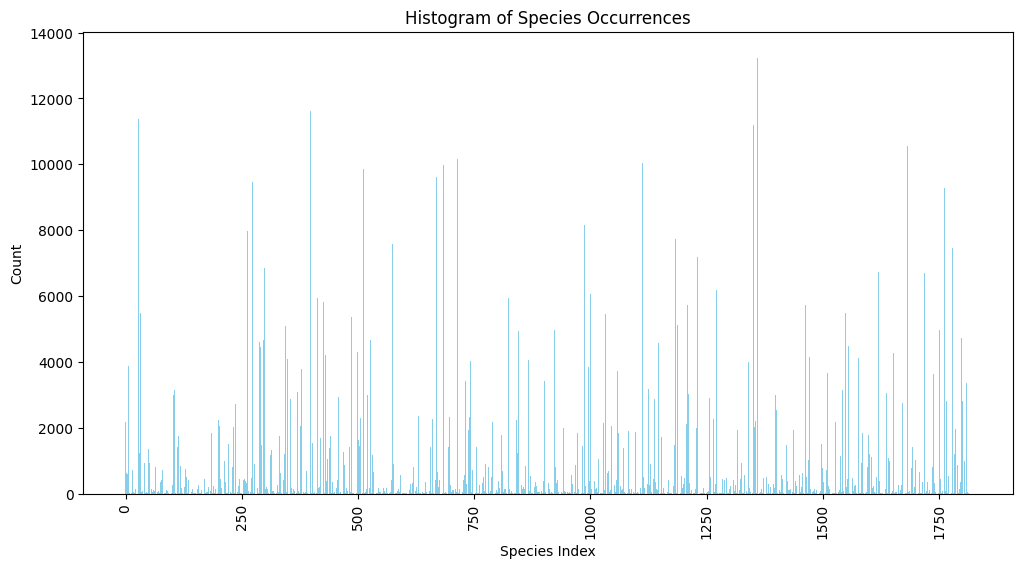

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(class_counts_dict.keys(), class_counts_dict.values(), color='skyblue')

# Labels and title
plt.xlabel('Species Index')
plt.ylabel('Count')
plt.title('Histogram of Species Occurrences')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

# Show the plot
plt.show()


### Data Loader Pytorch

In [14]:
# with open("../data/Full_Scale/vectorized_gbif_assemblages_climatic_1991-2018_64.pkl", "rb") as file:
#     df = pickle.load(file)
# df

In [15]:
from sklearn.model_selection import train_test_split

#### Normal Data Loader

In [16]:
class MultiLabelDataset(Dataset):
    def __init__(self):
        self.x_train, self.x_val, self.x_test, self.y_train, self.y_val, self.y_test = None, None, None, None, None, None
        self.mode = 'train'

        self.images_no_perm = torch.tensor(np.stack(df['climatic_map'].values).astype(np.float32))#.to(device)  # Move data to GPU
        self.labels = torch.tensor(np.stack(df['species_vector'].values).astype(np.float32))#.to(device)  # Move labels to GPU
        self.images = []
    
        permuted_images = []
        for image in self.images_no_perm:
            permuted_image = image.permute(2, 0, 1)
            self.images.append(permuted_image)
        
        

    def train_val_test_split(self):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.images, self.labels, test_size = 0.15, random_state=42)
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(self.x_train, self.y_train, test_size = 0.15, random_state=42)
    def __len__(self):
        if self.mode == 'train':
            return len(self.x_train)
        elif self.mode == 'val':
            return len(self.x_val)
        elif self.mode == 'test':
            return len(self.x_test)


    def __getitem__(self, idx):
        if self.mode == 'train':
            sample = {'images': self.x_train[idx], 'labels': self.y_train[idx]}
        elif self.mode == 'val':
            sample = {'images': self.x_val[idx], 'labels': self.y_val[idx]}
        elif self.mode == 'test':
            sample = {'images': self.x_test[idx], 'labels': self.y_test[idx]}
        return sample

### Rescaling 

In [17]:
class MultiLabelDatasetRescale(Dataset):
    def __init__(self):
        self.x_train, self.x_val, self.x_test, self.y_train, self.y_val, self.y_test = None, None, None, None, None, None
        self.mode = 'train'

        # Stack and convert to float32 tensor
        raw_images = torch.tensor(np.stack(df['climatic_map'].values).astype(np.float32))  # shape: [N, H, W, C]
        self.labels = torch.tensor(np.stack(df['species_vector'].values).astype(np.float32))

        # Transpose to  [C, H, W] for PyTorch
        # raw_images = raw_images.permute(2, 0, 1)
        raw_images = raw_images.permute(0, 3, 1, 2)

        # === NORMALIZE EACH CHANNEL INDEPENDENTLY ===
        # These must match the order of your channels!
        mins = torch.tensor([
            1.9000409841537476,          # gdd5
            1.44621741771698,            # prsd
            0.9102739691734314,          # bio12d
            0.009359435178339481,         # swe
            -9.149993896484375,          # bio01d
            3.1500244140625,             # bio04d
            0.0,                         # cdd
            0.0,                         # fd
            1.0523613691329956,          # bio15d
            0.0,                         # scd
            0.0,                         # altitude
        ])

        maxs = torch.tensor([
            3858.301513671875, # gdd5
            29.09852409362793, # prsd
            21.650711059570312, #bio12d
            113.7122802734375, # swe
            10.45001220703125, #bio01d
            157.55001831054688, #bio04d
            8.0, #cdd
            362.0, # fd
            2.7762691974639893, #bio15d
            365.0, # scd
            2296.0, #altitude
        ])

        # Avoid division by zero (e.g., for crs with constant 0)
        ranges = maxs - mins
        ranges[ranges == 0] = 1  # Prevent division by zero

        # Apply scaling: (x - min) / (max - min)
        # self.images = (raw_images - mins.view(-1, 1, 1)) / ranges.view(-1, 1, 1)
        self.images = (raw_images - mins.view(1, -1, 1, 1)) / ranges.view(1, -1, 1, 1)

    def train_val_test_split(self):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.images, self.labels, test_size=0.15, random_state=42)
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(self.x_train, self.y_train, test_size=0.15, random_state=42)
        
    def full_train_val_test_split(self):
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(self.images, self.labels, test_size=0.15, random_state=42)

    def __len__(self):
        if self.mode == 'train':
            return len(self.x_train)
        elif self.mode == 'val':
            return len(self.x_val)
        elif self.mode == 'test':
            return len(self.x_test)

    def __getitem__(self, idx):
        if self.mode == 'train':
            return {'images': self.x_train[idx], 'labels': self.y_train[idx]}
        elif self.mode == 'val':
            return {'images': self.x_val[idx], 'labels': self.y_val[idx]}
        elif self.mode == 'test':
            return {'images': self.x_test[idx], 'labels': self.y_test[idx]}

### Resize Data

In [18]:
from torchvision import transforms

class MultiLabelDatasetResize(Dataset):
    def __init__(self):
        self.x_train, self.x_val, self.x_test, self.y_train, self.y_val, self.y_test = None, None, None, None, None, None
        self.mode = 'train'

        self.images_no_perm = torch.tensor(np.stack(df['climatic_map'].values).astype(np.float32))
        self.labels = torch.tensor(np.stack(df['species_vector'].values).astype(np.float32))
        self.images = []

        permuted_images = []
        for image in self.images_no_perm:
            permuted_image = image.permute(2, 0, 1)  # Change the order to (C, H, W)
            self.images.append(permuted_image)
        
        # Define the transformation (Resize to 224x224 and Convert to Tensor)
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),  # Resize image to 224x224
        ])

    def train_val_test_split(self):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.images, self.labels, test_size=0.15, random_state=42)
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(self.x_train, self.y_train, test_size=0.15, random_state=42)

    def __len__(self):
        if self.mode == 'train':
            return len(self.x_train)
        elif self.mode == 'val':
            return len(self.x_val)
        elif self.mode == 'test':
            return len(self.x_test)

    def __getitem__(self, idx):
        if self.mode == 'train':
            image = self.x_train[idx]
            label = self.y_train[idx]
        elif self.mode == 'val':
            image = self.x_val[idx]
            label = self.y_val[idx]
        elif self.mode == 'test':
            image = self.x_test[idx]
            label = self.y_test[idx]
        
        # Apply the transformation (resize, convert to tensor, etc.)
        image = self.transform(image)
        
        return {'images': image, 'labels': label}


#### Testing data pipeline

In [19]:
# d = MultiLabelDataset()
d = MultiLabelDatasetRescale()

In [20]:
d.train_val_test_split()

In [21]:
d.mode = 'train'
len(d)

39047

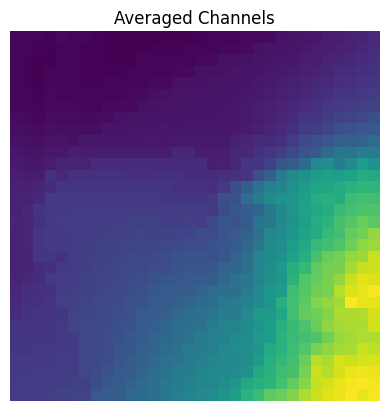

In [16]:

# Plotting the image
# Since the image is in (C, H, W) format, we need to reorder it to (H, W, C) for display
image = d.images[0].permute(1, 2, 0)  # (C, H, W) -> (H, W, C)
 # (C, H, W) -> (H, W, C)
# Average across channels to create a single image
image_avg = image.mean(axis=-1)  # Average along the last axis (channels)

# Plotting the average image
plt.imshow(image_avg, cmap='viridis')  # You can change the colormap
plt.title('Averaged Channels')
plt.axis('off')
plt.show()

In [17]:
image = d.images[0]
image.shape, image

(torch.Size([11, 32, 32]),
 tensor([[[0.4164, 0.4165, 0.4167,  ..., 0.4181, 0.4178, 0.4176],
          [0.4166, 0.4169, 0.4170,  ..., 0.4184, 0.4183, 0.4183],
          [0.4168, 0.4170, 0.4170,  ..., 0.4191, 0.4191, 0.4189],
          ...,
          [0.4203, 0.4210, 0.4218,  ..., 0.4251, 0.4297, 0.4306],
          [0.4200, 0.4210, 0.4217,  ..., 0.4247, 0.4254, 0.4313],
          [0.4199, 0.4209, 0.4215,  ..., 0.4291, 0.4344, 0.4379]],
 
         [[0.1295, 0.1297, 0.1298,  ..., 0.1404, 0.1413, 0.1422],
          [0.1297, 0.1298, 0.1299,  ..., 0.1411, 0.1420, 0.1429],
          [0.1298, 0.1299, 0.1300,  ..., 0.1419, 0.1428, 0.1436],
          ...,
          [0.1451, 0.1452, 0.1454,  ..., 0.1787, 0.1781, 0.1781],
          [0.1456, 0.1459, 0.1461,  ..., 0.1793, 0.1799, 0.1782],
          [0.1461, 0.1465, 0.1468,  ..., 0.1775, 0.1767, 0.1760]],
 
         [[0.1473, 0.1478, 0.1483,  ..., 0.1659, 0.1669, 0.1679],
          [0.1478, 0.1483, 0.1487,  ..., 0.1669, 0.1679, 0.1689],
          [0.

In [20]:
image_labels = d.labels[0]
for idx, value in enumerate(image_labels):
    if value != 0:
        print(f"Index: {idx}, Value: {value}")
image_labels,len(image_labels)

Index: 168, Value: 1.0
Index: 303, Value: 1.0
Index: 344, Value: 1.0
Index: 494, Value: 1.0
Index: 508, Value: 1.0
Index: 574, Value: 1.0
Index: 871, Value: 1.0
Index: 922, Value: 1.0
Index: 1097, Value: 1.0
Index: 1112, Value: 1.0
Index: 1181, Value: 1.0
Index: 1212, Value: 1.0
Index: 1307, Value: 1.0
Index: 1354, Value: 1.0
Index: 1413, Value: 1.0
Index: 1762, Value: 1.0


(tensor([0., 0., 0.,  ..., 0., 0., 0.]), 1819)

### Functions

In [22]:
def intersection_over_union_top_n(y_true, y_pred, top_n=20):
    """
    Calculate IoU (Intersection over Union) based on top-N predicted labels for multilabel classification.

    Args:
    - y_true (Tensor): True labels, shape (batch_size, num_classes).
    - y_pred (Tensor): Predicted logits, shape (batch_size, num_classes).
    - top_n (int): The number of top predictions to consider for IoU calculation.

    Returns:
    - IoU (float): IoU score for the batch considering top-N predictions.
    """
    # Apply sigmoid to get probabilities from logits
    y_pred = torch.sigmoid(y_pred)

    # Get the top-N predicted indices for each sample
    top_n_preds = torch.topk(y_pred, top_n, dim=1).indices  # shape: (batch_size, top_n)

    # Convert to binary predictions for top-N predictions
    y_true_bin = y_true.clone().detach().to(torch.bool)  # Convert to boolean type
    y_pred_bin = torch.zeros_like(y_true_bin, dtype=torch.bool)  # Binary predicted matrix

    for i in range(y_true.size(0)):
        for idx in top_n_preds[i]:  # Top-N predicted indices
            y_pred_bin[i, idx] = 1  # Mark top-N predictions as 1

    # Calculate intersection and union for each class
    intersection = (y_true_bin & y_pred_bin).sum(axis=0)  # Logical AND
    union = (y_true_bin | y_pred_bin).sum(axis=0)  # Logical OR
    
    iou = intersection / (union + 1e-6)  # Adding epsilon to avoid division by zero
    return iou.mean()  # Return the mean IoU across all classes

# Example usage inside the training/validation loop:
#iou = intersection_over_union_top_n(labels, y_hat, top_n=20)


In [23]:
##Meter aqui las metric error buenas!!!
import torch.nn.functional as F
import torch.distributed as dist
import argparse

class CustomLoss(nn.Module):
    def __init__(self, loss_fn, args):
        super(CustomLoss, self).__init__()
        self.loss_fn = loss_fn
        self.weighted = args.weighted
        self.args = args
        if self.weighted:
            self.samples_per_cls = list(args.train_label_cnt.values())
            self.no_of_classes = args.num_classes

    def compute_weights(self, labels, beta=0.9999):
        effective_num = 1.0 - np.power(beta, self.samples_per_cls)
        weights = (1.0 - beta) / np.array(effective_num)
        weights = weights / weights.sum() * self.no_of_classes
        labels_one_hot = labels

        weights = torch.tensor(weights).float().to(self.args.device, non_blocking=True)
        weights = weights.unsqueeze(0)
        weights = weights.repeat(labels_one_hot.shape[0],1) * labels_one_hot
        
        return weights
    
    def forward_focal(self, logits, labels,alpha=0.999,gamma=2.0):
        p = torch.sigmoid(logits)
        ce_loss = F.binary_cross_entropy_with_logits(logits, labels, reduction="none")
        p_t = p * labels + (1 - p) * (1 - labels)
        loss = ce_loss * ((1 - p_t) ** gamma)
        
        if self.weighted:
            weights = self.compute_weights(labels)
            weights_t = weights * labels * alpha + (1 - labels) * (1 - alpha)
            weighted_loss = weights_t * loss
            focal_loss = weighted_loss.mean()
        
        else:
            alpha_t = alpha * labels + (1 - alpha) * (1 - labels)
            focal_loss = alpha_t * loss
            focal_loss = focal_loss.mean()
        
        return focal_loss

    
    def forward_bce(self, logits, labels):
        if self.weighted:
            weights = self.compute_weights(labels)
            bce_loss = F.binary_cross_entropy_with_logits(logits, labels, pos_weight = weights)
        else:
            bce_loss = F.binary_cross_entropy_with_logits(logits, labels)
        
        return bce_loss
    
    
    def forward_dice(self, logits, labels):
        p = torch.sigmoid(logits)
        smooth = 1.0
        intersection = (p * labels).sum(0)
        total = (p**2 + labels**2).sum(0)
        dice_loss = 1 - (intersection + smooth)/(total + smooth)
        
        return dice_loss.mean()
    
    
    def forward(self, logits, labels):
        if self.loss_fn == 'bce':
            return self.forward_bce(logits, labels)
        elif self.loss_fn == 'focal':
            return self.forward_focal(logits, labels)
        elif self.loss_fn == 'dice':
            return self.forward_dice(logits, labels)
        
# Example args (you can replace it with your actual arguments)
class Args:
    def __init__(self):
        self.weighted = True  # Set to False if no class weighting is needed
        self.train_label_cnt = class_counts_dict  # Example class counts
        self.num_classes = 1819  # Binary classification
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model_type = 'CNN'
        self.eval = False
        self.thres_method = 'adaptive' # 'global'
        self.threshold = 0.15

### Evaluation Metrics

In [24]:
def compute_scores(outputs, targets, threshold=0.45):
    
    prob = outputs >= threshold
    label = targets >= threshold
    TP = (prob & label).sum(0).float()
    TN = ((~prob) & (~label)).sum(0).float()
    FP = (prob & (~label)).sum(0).float()
    FN = ((~prob) & label).sum(0).float()
    
    return TP, TN, FP, FN


def compute_metrics(TP, TN, FP, FN, weight):
    
    # macro true skill score
    macro_recall = TP / (TP + FN + 1e-8)
    macro_specificity = TN / (TN + FP + 1e-8)
    macro_tss = torch.mean(macro_recall + macro_specificity - 1)
    
    # micro true skill score
    micro_recall = TP.sum() / (TP.sum() + FN.sum())
    micro_specificity = TN.sum() / (TN.sum() + FP.sum())
    micro_tss = micro_recall + micro_specificity - 1
    
    # weighted true skill score
    weighted_recall = weight @ macro_recall
    weighted_specificity = weight @ macro_specificity
    weighted_tss = weighted_recall + weighted_specificity - 1
    
    # true skill score per class
    
    return macro_tss.item(), micro_tss.item(), weighted_tss.item()


def compute_metrics_per_cls(TP, TN, FP, FN):
    
    # macro true skill score
    recall = TP / (TP + FN + 1e-8)
    specificity = TN / (TN + FP + 1e-8)
    
    #P = TP + FN
    #N = FP + TN
    #prevalence = P / (P + N + 1e-8)
    
    # true skill score per class
    tss = recall + specificity - 1
    
    return recall, specificity, tss
    

def evaluate(model, eval_loader, criterion,thresholds, args):
    
    TP, TN, FP, FN = 0., 0., 0., 0.
    label_cnt = 0.
    eval_loss = []
    model.eval()
    with torch.no_grad():
        # for data, targets in tqdm(eval_loader, file=sys.stdout):
        for batch in eval_loader:
            if args.model_type=="MLP" or args.model_type=="CNN" or args.model_type=="ViT":
                samples = batch['images'].to(args.device, non_blocking=True)
                outputs = model(samples)
            elif args.model_type=="Fusion":
                samples_img, samples_meta = data
                samples_img = samples_img.to(args.device, non_blocking=True)
                samples_meta = samples_meta.to(args.device, non_blocking=True)
                outputs = model(samples_img, samples_meta)
                
            targets = batch['labels'].to(args.device, non_blocking=True)
            label_cnt += targets.sum(0).float()
            
            loss = criterion(outputs, targets)
            eval_loss.append(loss.item())
            
            if args.thres_method == 'adaptive':
                # thresholds = torch.load(args.output_dir.joinpath('thresholds_train.pth'))
                thresholds = torch.tensor(thresholds, dtype=torch.float32).to("cuda:0")
                # thresholds = torch.tensor(thresholds).to(args.device)
            elif args.thres_method == 'global':
                thresholds = args.threshold
                
            tp, tn, fp, fn = compute_scores(torch.sigmoid(outputs), targets, thresholds)
            TP += tp
            TN += tn
            FP += fp
            FN += fn
        
        eval_loss = torch.tensor(eval_loss).mean().item()
        weight = label_cnt / label_cnt.sum()
        macro_tss, micro_tss, weighted_tss = compute_metrics(TP, TN, FP, FN, weight=weight)
        
        if args.eval:
            recall, spec, tss = compute_metrics_per_cls(TP, TN, FP, FN)
            species = []
            cdref2species = pd.read_csv('filelist/cdref2species.csv')
            for ref in list(map(float, args.classes)):
                temp = cdref2species.loc[cdref2species.cd_ref==ref]
                species.append(temp.nom_reconnu.values[0])
            df = pd.DataFrame({'species':species, 'train_cnt':args.train_label_cnt.values(), 'test_cnt': args.test_label_cnt.values(), 'recall': recall.detach().cpu(), 'specificity': spec.detach().cpu(), 'tss':tss.detach().cpu()})
            df.to_csv(args.output_dir.joinpath('{}_tss_per_cls.csv'.format(args.model_type)), index=False)
            print('Per class performance saved!')
        
        eval_stats = {'eval_loss': eval_loss, 'macro_tss': macro_tss, 'micro_tss': micro_tss, 'weighted_tss': weighted_tss}
        
        return eval_stats
            

### Baseline

In [25]:
class CNNModel(nn.Module):
    def __init__(self, input_channels, input_size, num_classes):
        super(CNNModel, self).__init__()

        # First Convolutional Block
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Separate pool for the first block

        # Second Convolutional Block
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Separate pool for the second block

        # Third Convolutional Block
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # Separate pool for the third block

        # Fully Connected Layers
        self.fc1 = nn.Linear(256 * (input_size // 8) * (input_size // 8), 256)
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Applying each block separately
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))

        # Flatten the output for fully connected layers
        x = torch.flatten(x, start_dim=1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)

        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        x = self.fc3(x)   # No need for sigmoid here for multi-label; use BCEWithLogitsLoss instead

        return x


class CNNModel_1(nn.Module):
    def __init__(self, input_channels,input_size, num_classes):
        super(CNNModel_1, self).__init__()

        # First Convolutional Block
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=5, padding=2)  # 'same' padding in TensorFlow = padding=2
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling2D(pool_size=(2, 2))

        # Second Convolutional Block
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling2D(pool_size=(2, 2))

        # Third Convolutional Block
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling2D(pool_size=(2, 2))
        
        # Fourth Convolutional Block
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling2D(pool_size=(2, 2))

        # Fully Connected Layers
        self.fc1 = nn.Linear(512 * (input_size // 16) * (input_size // 16), 1024)  # Flatten output size depends on input size
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.pool4(F.relu(self.bn4(self.conv4(x))))

        x = torch.flatten(x, start_dim=1)  # Flatten the output for fully connected layers

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)

        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        x = self.fc3(x)   # x = torch.sigmoid(self.fc3(x))  # Assuming binary classification

        return x


class DeepCNNModel(nn.Module):
    def __init__(self, input_channels, input_size, num_classes):
        super(DeepCNNModel, self).__init__()

        # First Convolutional Block
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second Convolutional Block
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Third Convolutional Block
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fourth Convolutional Block
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fifth Convolutional Block
        self.conv5 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(1024)
        self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layers
        self.fc1 = nn.Linear(1024 * (input_size // 32) * (input_size // 32), 2048)
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(2048, 1024)
        self.dropout2 = nn.Dropout(0.4)

        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.pool4(F.relu(self.bn4(self.conv4(x))))
        x = self.pool5(F.relu(self.bn5(self.conv5(x))))

        x = torch.flatten(x, start_dim=1)

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)

        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x


### Train functions

In [26]:
def model_training(dataloader,dataset,num_epochs,model,custom_loss,optimizer):
    
    # dataloader = DataLoader(dataset, batch_size = 32, shuffle = False)

    epoch_train_loss = []
    epoch_val_loss = []

    for epoch in range(num_epochs):
        train_losses = []
        dataset.mode = 'train'
        model.train()
        for D in dataloader:
            optimizer.zero_grad()
            data = D['images'].to(device, dtype = torch.float)
            labels = D['labels'].to(device, dtype = torch.float)
            y_hat = model(data)
            loss = custom_loss(y_hat, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

        epoch_train_loss.append(np.mean(train_losses))

        val_losses = []
        val_iou = []

        dataset.mode = 'val'
        model.eval()
        with torch.no_grad():
            for D in dataloader:
                data = D['images'].to(device, dtype = torch.float)
                labels = D['labels'].to(device, dtype = torch.float)
                y_hat = model(data)
                loss = custom_loss(y_hat, labels)
                val_losses.append(loss.item())

        epoch_val_loss.append(np.mean(val_losses))

        print(f'Train Epoch: {epoch+1} \t Train Loss:{np.mean(train_losses)} \t Val Loss: {np.mean(val_losses)}')
    
    return model, epoch_train_loss, epoch_val_loss


def training_early_stopping(dataloader, dataset, num_epochs, model, custom_loss, optimizer,delta = 1e-6,patience=5):
    
    # Initialize the learning rate scheduler
    scheduler = CosineLRScheduler(
        optimizer, 
        t_initial=num_epochs,    # Total epochs
        lr_min=1e-4,             # Minimum LR
        warmup_t=10,              # Warm-up epochs
        warmup_lr_init=1e-3      # Initial warm-up LR
    )

    epoch_train_loss = []
    epoch_val_loss = []
    
    best_val_loss = float('inf')
    early_stop_counter = 0
    best_model_state = None

    for epoch in range(num_epochs):
        train_losses = []
        dataset.mode = 'train'
        model.train()

        for D in dataloader:
            optimizer.zero_grad()
            data = D['images'].to(device, dtype=torch.float)
            labels = D['labels'].to(device, dtype=torch.float)
            y_hat = model(data)
            loss = custom_loss(y_hat, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

        epoch_train_loss.append(np.mean(train_losses))

        # Validation
        val_losses = []
        dataset.mode = 'val'
        model.eval()
        with torch.no_grad():
            for D in dataloader:
                data = D['images'].to(device, dtype=torch.float)
                labels = D['labels'].to(device, dtype=torch.float)
                y_hat = model(data)
                loss = custom_loss(y_hat, labels)
                val_losses.append(loss.item())
                
        current_val_loss = np.mean(val_losses)
        epoch_val_loss.append(np.mean(val_losses))

        # **Update Learning Rate Scheduler**
        scheduler.step(epoch + 1)

        # Print progress
        print(f'Train Epoch: {epoch+1} \t Train Loss: {np.mean(train_losses):.6f} \t Val Loss: {np.mean(val_losses):.6f}')
        print(f'Learning Rate: {optimizer.param_groups[0]["lr"]:.8f}')
        
        # Early Stopping Check
        if current_val_loss + delta < best_val_loss:
            best_val_loss = current_val_loss
            best_model_state = model.state_dict()
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            print(f"⚠️ No improvement for {early_stop_counter} epoch(s).")

        if early_stop_counter >= patience:
            print(f"⏹️ Early stopping triggered after {epoch+1} epochs.")
            break

    # Load best model before returning
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return model, epoch_train_loss, epoch_val_loss

In [27]:
def plot_loss(epoch_train_loss, epoch_val_loss):
    """
    Plots training and validation loss over epochs.

    Parameters:
    - epoch_train_loss (list or array): Training loss values per epoch.
    - epoch_val_loss (list or array): Validation loss values per epoch.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_train_loss, label='Train Loss', color='r')
    plt.plot(epoch_val_loss, label='Validation Loss', color='b')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

### Threshold Functions

In [28]:
from sklearn.metrics import roc_curve

def get_thresholds(predictions, targets):
    threshold_list = []
    fpr_list = []
    tpr_list = []
    ix_list = []
    for i in range(targets.shape[-1]):
        fpr, tpr, thresholds = roc_curve(targets[:,i], predictions[:,i])
        J = tpr - fpr
        ix = np.argmax(J)
        
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        ix_list.append(ix)
        threshold_list.append(thresholds[ix])
    return fpr_list, tpr_list, ix_list, threshold_list

In [29]:
def computing_thresholds(model,dataset,dataloader):    
    # Set model to evaluation mode
    model.eval()

    # Initialize empty lists to collect all predictions and targets
    all_predictions = []
    all_targets = []
    dataset.mode = 'val'
    # Run through the dataloader
    with torch.no_grad():
        for D in dataloader:
            data = D['images'].to(device, dtype=torch.float)
            labels = D['labels'].to(device, dtype=torch.float)

            # Forward pass
            y_hat = model(data)

            # Apply sigmoid to the model's raw output
            output_sigmoid = torch.sigmoid(y_hat)

            # Collect predictions and targets for threshold calculation
            all_predictions.append(output_sigmoid.cpu().numpy())  # Convert to CPU and numpy for roc_curve
            all_targets.append(labels.cpu().numpy())  # Convert to CPU and numpy

    # Convert lists to numpy arrays for threshold calculation
    all_predictions = np.vstack(all_predictions)  # Shape: (num_samples, num_classes)
    all_targets = np.vstack(all_targets)  # Shape: (num_samples, num_classes)

    # Call the function to compute thresholds
    fpr_CNN, tpr_CNN, ix_CNN, thresholds_CNN = get_thresholds(all_predictions, all_targets)
    return fpr_CNN, tpr_CNN, ix_CNN, thresholds_CNN

In [30]:
# Function to set the seed for each worker
def seed_worker(worker_id):
    # Set seed for Python and NumPy in each worker
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

### Instantiating Dataset

In [70]:
# mlc_dataset = MultiLabelDataset()
mlc_dataset = MultiLabelDatasetRescale()
mlc_dataset.train_val_test_split()
dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True, worker_init_fn=seed_worker)

In [31]:
device = torch.device('cuda:0')

### BCE

In [68]:
args = Args()

num_classes = 1819
input_channels = 11
input_size = 32
# model =  DeepCNNModel(input_channels,input_size,num_classes).to(args.device) # CNNModel(input_channels,input_size,num_classes).to(args.device)
model =  CNNModel_1(input_channels,input_size,num_classes).to(args.device) # CNNModel(input_channels,input_size,num_classes).to(args.device)
loss_fn = 'bce'  # Choose one of ['bce', 'focal', 'dice']
num_epochs = 100
eta = 0.001
optimizer = torch.optim.AdamW(model.parameters(), lr=eta,weight_decay=5e-2)




# custom_loss = CustomLoss(loss_fn, args).to(args.device)



In [69]:
# model_BCE, epoch_train_loss_BCE, epoch_val_loss_BCE = model_training(dataloader=dataloader,dataset=mlc_dataset,
#                                                                      num_epochs = num_epochs,
#                                                                      model = model,
#                                                                      custom_loss = CustomLoss(loss_fn, args).to(args.device),
#                                                                      optimizer = optimizer)

model_BCE, epoch_train_loss_BCE, epoch_val_loss_BCE = training_early_stopping(dataloader=dataloader, dataset = mlc_dataset,
                                                                                     num_epochs = num_epochs,
                                                                                     model = model,
                                                                                     custom_loss = CustomLoss(loss_fn, args).to(args.device),
                                                                                     optimizer = optimizer)

Train Epoch: 1 	 Train Loss: 0.009312 	 Val Loss: 0.007490
Learning Rate: 0.00100000
Train Epoch: 2 	 Train Loss: 0.007235 	 Val Loss: 0.008681
Learning Rate: 0.00100000
⚠️ No improvement for 1 epoch(s).
Train Epoch: 3 	 Train Loss: 0.006832 	 Val Loss: 0.006451
Learning Rate: 0.00100000
Train Epoch: 4 	 Train Loss: 0.006810 	 Val Loss: 0.006518
Learning Rate: 0.00100000
⚠️ No improvement for 1 epoch(s).
Train Epoch: 5 	 Train Loss: 0.006765 	 Val Loss: 0.006411
Learning Rate: 0.00100000
Train Epoch: 6 	 Train Loss: 0.006685 	 Val Loss: 0.006356
Learning Rate: 0.00100000
Train Epoch: 7 	 Train Loss: 0.006613 	 Val Loss: 0.006322
Learning Rate: 0.00100000
Train Epoch: 8 	 Train Loss: 0.006561 	 Val Loss: 0.006270
Learning Rate: 0.00100000
Train Epoch: 9 	 Train Loss: 0.006475 	 Val Loss: 0.006236
Learning Rate: 0.00100000
Train Epoch: 10 	 Train Loss: 0.006449 	 Val Loss: 0.006169
Learning Rate: 0.00097798
Train Epoch: 11 	 Train Loss: 0.006426 	 Val Loss: 0.006163
Learning Rate: 0.0009

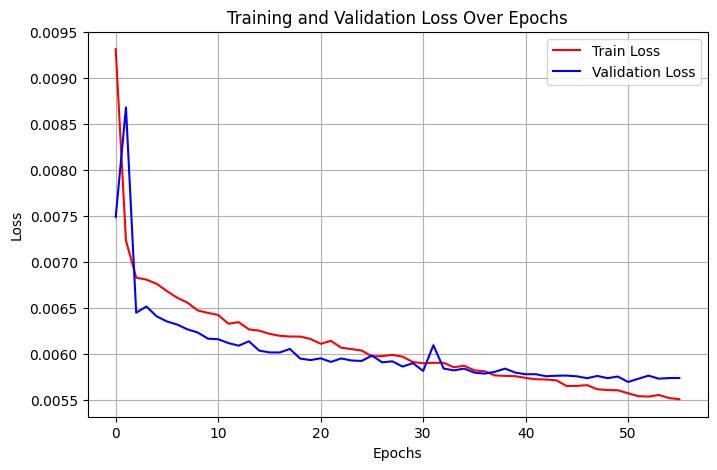

In [70]:
plot_loss(epoch_train_loss_BCE,epoch_val_loss_BCE)

In [34]:
fpr_BCE, tpr_BCE, ix_BCE, thresholds_BCE = computing_thresholds(model = model_BCE,dataset=mlc_dataset,dataloader=dataloader)


mlc_dataset.mode = 'test'
eval_stats = evaluate(model = model_BCE, eval_loader = dataloader, criterion = CustomLoss(loss_fn, args).to(args.device), thresholds = np.array(thresholds_BCE), args = Args())
print(eval_stats)

C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sk

{'eval_loss': 0.005918614566326141, 'macro_tss': 0.5128385424613953, 'micro_tss': 0.5335016250610352, 'weighted_tss': 0.3836725950241089}


#### Saving Model

In [160]:
with open('..\\models\\thresholds_BCE_53_tss_1991-2018.pkl', 'wb') as f:
    pickle.dump(np.array(thresholds_BCE), f)

In [63]:
# Load the NumPy array from the pickle file
# with open('../data/thresholds.pkl', 'rb') as f:
#     loaded_thresholds = pickle.load(f)

In [161]:
PATH = '..\\models\\CNNModel_1_BCE_53_tss_1991-2018'
# PATH= '../models/DeepCNNModel'
torch.save(model_BCE.state_dict(), PATH)

In [162]:
# model = DeepCNNModel(input_channels,input_size,num_classes)
model = CNNModel_1(input_channels,input_size,num_classes)
model.load_state_dict(torch.load(PATH, weights_only=True))
model.to(args.device) 
model.eval()

CNNModel_1(
  (conv1): Conv2d(11, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, d

In [163]:
mlc_dataset.mode = 'test'
# custom_loss = CustomLoss('focal', args).to(args.device)
custom_loss = CustomLoss('bce', args).to(args.device)

eval_stats = evaluate(model = model, 
                      eval_loader = dataloader, 
                      criterion = custom_loss, 
                      thresholds = thresholds_BCE, #loaded_thresholds, 
                      args = Args())
print(eval_stats)

C:\Users\Raul\AppData\Local\Temp\ipykernel_8808\1625301664.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  thresholds = torch.tensor(thresholds, dtype=torch.float32).to("cuda:0")


{'eval_loss': 0.0058320555835962296, 'macro_tss': 0.5229519605636597, 'micro_tss': 0.566795825958252, 'weighted_tss': 0.38426685333251953}


#### Testing

In [267]:
args = Args()

num_classes = 1819
input_channels = 11
input_size = 32

eta = 0.001

model =  CNNModel_1(input_channels,input_size,num_classes).to(args.device) # CNNModel(input_channels,input_size,num_classes).to(args.device)
# model = model.to(device)
loss_fn = 'bce'  # Choose one of ['bce', 'focal', 'dice']
custom_loss = CustomLoss(loss_fn, args).to(args.device)
optimizer = torch.optim.AdamW(model.parameters(), lr=eta)
num_epochs = 20


In [163]:


dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True)

epoch_train_loss = []
epoch_val_loss = []
epoch_train_iou = []
epoch_val_iou = []

In [187]:
for epoch in range(num_epochs):
    train_losses = []
    train_iou = []
    mlc_dataset.mode = 'train'
    model.train()
    for D in dataloader:
        optimizer.zero_grad()
        data = D['images'].to(device, dtype = torch.float)
        labels = D['labels'].to(device, dtype = torch.float)
        y_hat = model(data)
        #error = nn.BCEWithLogitsLoss()
        #loss = torch.sum(error(y_hat,labels))
        loss = custom_loss(y_hat, labels)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        # t_iou = intersection_over_union_top_n(labels, y_hat, top_n=20)
        # train_iou.append(t_iou.item())
        
    epoch_train_loss.append(np.mean(train_losses))
    # epoch_train_iou.append(np.mean(np.array(train_iou)))#.cpu().numpy()))
    
    val_losses = []
    val_iou = []
    
    mlc_dataset.mode = 'val'
    model.eval()
    with torch.no_grad():
        for D in dataloader:
            data = D['images'].to(device, dtype = torch.float)
            labels = D['labels'].to(device, dtype = torch.float)
            y_hat = model(data)
            #error = nn.BCEWithLogitsLoss()
            # loss = torch.sum(error(y_hat,labels))
            loss = custom_loss(y_hat, labels)
            val_losses.append(loss.item())

            
            # v_iou = intersection_over_union_top_n(labels, y_hat, top_n=20)
            # val_iou.append(t_iou.item())
            
    epoch_val_loss.append(np.mean(val_losses))
    # epoch_val_iou.append(np.mean(np.array(val_iou)))#.cpu().numpy()))
    
    # print(f'Train Epoch: {epoch+1} \t Train Loss:{np.mean(train_losses)} \t Val Loss: {np.mean(val_losses)}\t Train IoU:{np.mean(train_iou)} \t Val IoU: {np.mean(val_iou)}')
    print(f'Train Epoch: {epoch+1} \t Train Loss:{np.mean(train_losses)} \t Val Loss: {np.mean(val_losses)}')

Train Epoch: 1 	 Train Loss:0.0005020384694295314 	 Val Loss: 0.0005215085058530272
Train Epoch: 2 	 Train Loss:0.0004998305983741236 	 Val Loss: 0.0005157571881605012
Train Epoch: 3 	 Train Loss:0.0005011478705533097 	 Val Loss: 0.0005227459025602803
Train Epoch: 4 	 Train Loss:0.000500060164087244 	 Val Loss: 0.0005210473439439153
Train Epoch: 5 	 Train Loss:0.0004989325099740236 	 Val Loss: 0.0005206868038423975
Train Epoch: 6 	 Train Loss:0.0005004230620399902 	 Val Loss: 0.0005472443601505246
Train Epoch: 7 	 Train Loss:0.0005054712816783139 	 Val Loss: 0.0005302726065688687
Train Epoch: 8 	 Train Loss:0.0004940480054471351 	 Val Loss: 0.0005378671407539761
Train Epoch: 9 	 Train Loss:0.0004957833075497964 	 Val Loss: 0.0005194968811553998
Train Epoch: 10 	 Train Loss:0.000492175314960285 	 Val Loss: 0.0005313327825298707
Train Epoch: 11 	 Train Loss:0.0004894750675919914 	 Val Loss: 0.0005158689260281528
Train Epoch: 12 	 Train Loss:0.0004888841864414516 	 Val Loss: 0.00052238961

KeyboardInterrupt: 

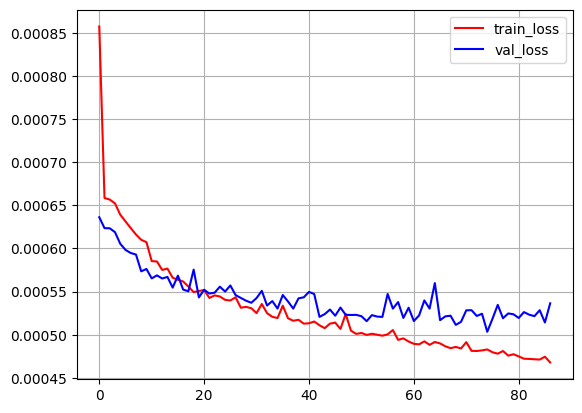

In [188]:
plt.plot(epoch_train_loss, label = 'train_loss', c = 'r')
plt.plot(epoch_val_loss, label = 'val_loss', c = 'b')
plt.legend()
plt.grid()
plt.show()

# plt.plot(epoch_train_iou, label = 'train_iou', c = 'r')
# plt.plot(epoch_val_iou, label = 'val_iou', c = 'b')
# plt.legend()
# plt.grid()
# plt.show()

### Focal Loss

In [128]:
args = Args()

num_classes = 1819
input_channels = 11
input_size = 32
# model =  DeepCNNModel(input_channels,input_size,num_classes).to(args.device) 
model =  CNNModel_1(input_channels,input_size,num_classes).to(args.device)
eta = 0.001
loss_fn = 'focal'  # Choose one of ['bce', 'focal', 'dice']
num_epochs = 100
optimizer = torch.optim.AdamW(model.parameters(), lr=eta,weight_decay=5e-2)



# custom_loss = CustomLoss(loss_fn, args).to(args.device)


In [129]:
# model_FOCAL, epoch_train_loss_FOCAL, epoch_val_loss_FOCAL = model_training(dataloader=dataloader,dataset=mlc_dataset,
#                                                                      num_epochs = num_epochs,
#                                                                      model = model,
#                                                                      custom_loss = CustomLoss(loss_fn, args).to(args.device),
#                                                                      optimizer = optimizer)

model_FOCAL, epoch_train_loss_FOCAL, epoch_val_loss_FOCAL = training_early_stopping(dataloader=dataloader, dataset = mlc_dataset,
                                                             num_epochs = num_epochs,
                                                             model = model,
                                                             custom_loss = CustomLoss(loss_fn, args).to(args.device),
                                                             optimizer = optimizer)

Train Epoch: 1 	 Train Loss: 0.000315 	 Val Loss: 0.000302
Learning Rate: 0.00100000
Train Epoch: 2 	 Train Loss: 0.000304 	 Val Loss: 0.000298
Learning Rate: 0.00100000
Train Epoch: 3 	 Train Loss: 0.000295 	 Val Loss: 0.000286
Learning Rate: 0.00100000
Train Epoch: 4 	 Train Loss: 0.000284 	 Val Loss: 0.000277
Learning Rate: 0.00100000
Train Epoch: 5 	 Train Loss: 0.000279 	 Val Loss: 0.000276
Learning Rate: 0.00100000
Train Epoch: 6 	 Train Loss: 0.000274 	 Val Loss: 0.000270
Learning Rate: 0.00100000
Train Epoch: 7 	 Train Loss: 0.000267 	 Val Loss: 0.000267
Learning Rate: 0.00100000
Train Epoch: 8 	 Train Loss: 0.000272 	 Val Loss: 0.000270
Learning Rate: 0.00100000
⚠️ No improvement for 1 epoch(s).
Train Epoch: 9 	 Train Loss: 0.000268 	 Val Loss: 0.000263
Learning Rate: 0.00100000
Train Epoch: 10 	 Train Loss: 0.000259 	 Val Loss: 0.000266
Learning Rate: 0.00097798
⚠️ No improvement for 1 epoch(s).
Train Epoch: 11 	 Train Loss: 0.000260 	 Val Loss: 0.000256
Learning Rate: 0.0009

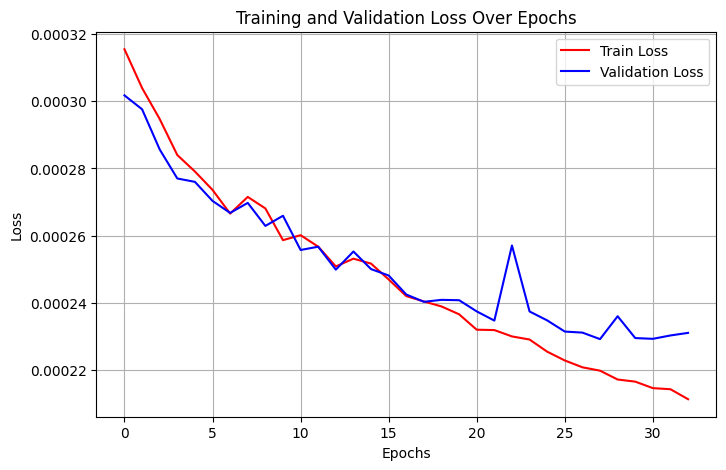

In [130]:
plot_loss(epoch_train_loss_FOCAL,epoch_val_loss_FOCAL)

In [131]:
fpr_FOCAL, tpr_FOCAL, ix_FOCAL, thresholds_FOCAL = computing_thresholds(model = model_FOCAL,dataset=mlc_dataset,dataloader=dataloader)


mlc_dataset.mode = 'test'
eval_stats = evaluate(model = model_FOCAL, eval_loader = dataloader, criterion = CustomLoss(loss_fn, args).to(args.device), thresholds = np.array(thresholds_FOCAL), args = Args())
print(eval_stats)

C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sk

{'eval_loss': 0.00023666920606046915, 'macro_tss': 0.47979384660720825, 'micro_tss': 0.5066971778869629, 'weighted_tss': 0.3658010959625244}


#### Training early stopping

In [31]:
args = Args()
num_classes = 1819
dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True)

num_epochs = 40
input_channels = 11
input_size = 32
# model =  CNNModel(input_channels,input_size,num_classes).to(args.device)
model = CNNModel_1(input_channels,input_size,num_classes).to(args.device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=5e-4)#1e-4, 5e-4

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Loss Function
loss_fn = 'focal'
criterion = CustomLoss(loss_fn, args).to(args.device)

In [87]:
model_FOCAL, epoch_train_loss_FOCAL, epoch_val_loss_FOCAL = training_early_stopping(dataloader=dataloader,
                                                                        dataset=mlc_dataset,
                                                                        num_epochs = num_epochs,
                                                                        model = model,
                                                                        custom_loss = CustomLoss(loss_fn, args).to(args.device),
                                                                        optimizer = optimizer,
                                                                        delta = 1e-6,
                                                                        patience = 3)

Train Epoch: 1 	 Train Loss: 0.000322 	 Val Loss: 0.000307
Learning Rate: 0.00100000
Train Epoch: 2 	 Train Loss: 0.000310 	 Val Loss: 0.000308
Learning Rate: 0.00100000
⚠️ No improvement for 1 epoch(s).
Train Epoch: 3 	 Train Loss: 0.000303 	 Val Loss: 0.000296
Learning Rate: 0.00100000
Train Epoch: 4 	 Train Loss: 0.000299 	 Val Loss: 0.000291
Learning Rate: 0.00100000
Train Epoch: 5 	 Train Loss: 0.000293 	 Val Loss: 0.000289
Learning Rate: 0.00096575
Train Epoch: 6 	 Train Loss: 0.000289 	 Val Loss: 0.000285
Learning Rate: 0.00095095
Train Epoch: 7 	 Train Loss: 0.000283 	 Val Loss: 0.000279
Learning Rate: 0.00093369
Train Epoch: 8 	 Train Loss: 0.000278 	 Val Loss: 0.000280
Learning Rate: 0.00091406
⚠️ No improvement for 1 epoch(s).
Train Epoch: 9 	 Train Loss: 0.000274 	 Val Loss: 0.000273
Learning Rate: 0.00089218
Train Epoch: 10 	 Train Loss: 0.000269 	 Val Loss: 0.000277
Learning Rate: 0.00086820
⚠️ No improvement for 1 epoch(s).
Train Epoch: 11 	 Train Loss: 0.000270 	 Val Lo

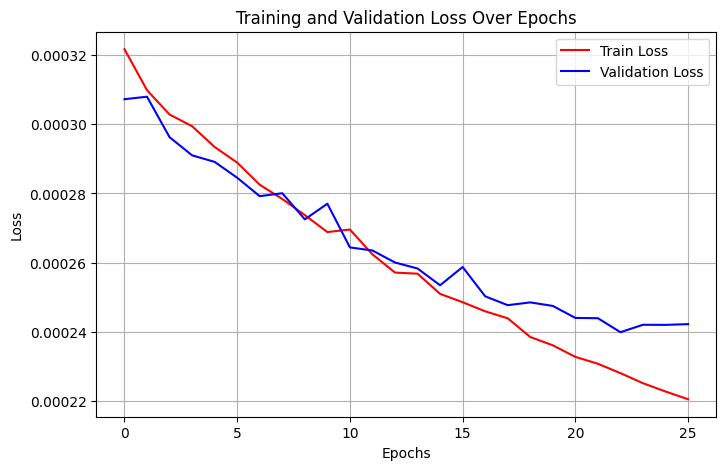

In [89]:
plot_loss(epoch_train_loss_FOCAL,epoch_val_loss_FOCAL)

In [90]:
fpr_FOCAL, tpr_FOCAL, ix_FOCAL, thresholds_FOCAL = computing_thresholds(model = model_FOCAL,dataset=mlc_dataset,dataloader=dataloader)


mlc_dataset.mode = 'test'
eval_stats = evaluate(model = model_FOCAL, eval_loader = dataloader, criterion = CustomLoss(loss_fn, args).to(args.device), thresholds = np.array(thresholds_FOCAL), args = Args())
print(eval_stats)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.w

{'eval_loss': 0.00024893274530768394, 'macro_tss': 0.46461939811706543, 'micro_tss': 0.4571514129638672, 'weighted_tss': 0.33380699157714844}


#### Save the model

In [132]:
# with open('..\\models\\thresholds_focal_50_tss_1991-2018.pkl', 'wb') as f:
#     pickle.dump(np.array(thresholds_FOCAL), f)

In [133]:
PATH = '..\\models\\CNNModel_1_FOCAL_50_tss_1991-2018'
# PATH= '../models/DeepCNNModel'
# torch.save(model_FOCAL.state_dict(), PATH)

In [96]:
# model = DeepCNNModel(input_channels,input_size,num_classes)
model = CNNModel_1(input_channels,input_size,num_classes)
model.load_state_dict(torch.load(PATH, weights_only=True))
model.to(args.device) 
model.eval()

CNNModel_1(
  (conv1): Conv2d(11, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, d

In [97]:
mlc_dataset.mode = 'test'
# custom_loss = CustomLoss('focal', args).to(args.device)
custom_loss = CustomLoss('focal', args).to(args.device)

eval_stats = evaluate(model = model, 
                      eval_loader = dataloader, 
                      criterion = custom_loss, 
                      thresholds = thresholds_FOCAL, #loaded_thresholds, 
                      args = Args())
print(eval_stats)

C:\Users\Raul\AppData\Local\Temp\ipykernel_2240\1625301664.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  thresholds = torch.tensor(thresholds, dtype=torch.float32).to("cuda:0")


{'eval_loss': 0.00023340382904279977, 'macro_tss': 0.4894373416900635, 'micro_tss': 0.5020015239715576, 'weighted_tss': 0.36169111728668213}


#### Testing

In [268]:
args = Args()

num_classes = 1819
input_channels = 11
input_size = 32

eta = 0.001

model =  DeepCNNModel(input_channels,input_size,num_classes).to(args.device)
# model = model.to(device)
loss_fn = 'focal'  # Choose one of ['bce', 'focal', 'dice']
custom_loss = CustomLoss(loss_fn, args).to(args.device)
optimizer = torch.optim.AdamW(model.parameters(), lr=eta)
num_epochs = 30


In [269]:
dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True)

epoch_train_loss = []
epoch_val_loss = []
epoch_train_iou = []
epoch_val_iou = []

In [270]:
for epoch in range(num_epochs):
    train_losses = []
    train_iou = []
    mlc_dataset.mode = 'train'
    model.train()
    for D in dataloader:
        optimizer.zero_grad()
        data = D['images'].to(device, dtype = torch.float)
        labels = D['labels'].to(device, dtype = torch.float)
        y_hat = model(data)
        #error = nn.BCEWithLogitsLoss()
        #loss = torch.sum(error(y_hat,labels))
        loss = custom_loss(y_hat, labels)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        # t_iou = intersection_over_union_top_n(labels, y_hat, top_n=20)
        # train_iou.append(t_iou.item())
        
    epoch_train_loss.append(np.mean(train_losses))
    # epoch_train_iou.append(np.mean(np.array(train_iou)))#.cpu().numpy()))
    
    val_losses = []
    val_iou = []
    
    mlc_dataset.mode = 'val'
    model.eval()
    with torch.no_grad():
        for D in dataloader:
            data = D['images'].to(device, dtype = torch.float)
            labels = D['labels'].to(device, dtype = torch.float)
            y_hat = model(data)
            #error = nn.BCEWithLogitsLoss()
            # loss = torch.sum(error(y_hat,labels))
            loss = custom_loss(y_hat, labels)
            val_losses.append(loss.item())

            
            # v_iou = intersection_over_union_top_n(labels, y_hat, top_n=20)
            # val_iou.append(t_iou.item())
            
    epoch_val_loss.append(np.mean(val_losses))
    # epoch_val_iou.append(np.mean(np.array(val_iou)))#.cpu().numpy()))
    
    # print(f'Train Epoch: {epoch+1} \t Train Loss:{np.mean(train_losses)} \t Val Loss: {np.mean(val_losses)}\t Train IoU:{np.mean(train_iou)} \t Val IoU: {np.mean(val_iou)}')
    print(f'Train Epoch: {epoch+1} \t Train Loss:{np.mean(train_losses)} \t Val Loss: {np.mean(val_losses)}')

Train Epoch: 1 	 Train Loss:0.0003981375052642344 	 Val Loss: 0.0002762617836721139
Train Epoch: 2 	 Train Loss:0.00028141957361118815 	 Val Loss: 0.0003070729832516162
Train Epoch: 3 	 Train Loss:0.00027866029423889125 	 Val Loss: 0.00026592986423411736
Train Epoch: 4 	 Train Loss:0.0002741703085947434 	 Val Loss: 0.000259408159085285
Train Epoch: 5 	 Train Loss:0.0002723158977023777 	 Val Loss: 0.00025652929801608324
Train Epoch: 6 	 Train Loss:0.0002693587819336337 	 Val Loss: 0.00025775130095514787
Train Epoch: 7 	 Train Loss:0.00026624961945322876 	 Val Loss: 0.0002523523891518303
Train Epoch: 8 	 Train Loss:0.0002617209525603481 	 Val Loss: 0.0002516244812641624
Train Epoch: 9 	 Train Loss:0.0002596593559168962 	 Val Loss: 0.00025184644390858504
Train Epoch: 10 	 Train Loss:0.00025545422100260257 	 Val Loss: 0.0002459377606948877
Train Epoch: 11 	 Train Loss:0.00024859917191853134 	 Val Loss: 0.00023933044169591425
Train Epoch: 12 	 Train Loss:0.0002470754867233196 	 Val Loss: 0.

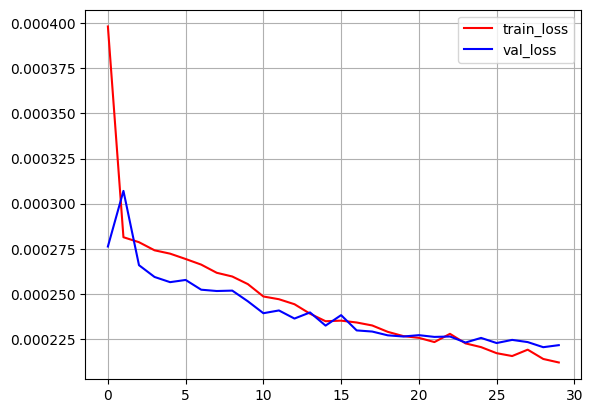

In [272]:
plt.plot(epoch_train_loss, label = 'train_loss', c = 'r')
plt.plot(epoch_val_loss, label = 'val_loss', c = 'b')
plt.legend()
plt.grid()
plt.show()

# plt.plot(epoch_train_iou, label = 'train_iou', c = 'r')
# plt.plot(epoch_val_iou, label = 'val_iou', c = 'b')
# plt.legend()
# plt.grid()
# plt.show()

#### Dice Loss

In [224]:
args = Args()

num_classes = 1819
input_channels = 11
input_size = 32

eta = 0.001

model =  CNNModel(input_channels,input_size,num_classes).to(args.device)
# model = model.to(device)
loss_fn = 'dice'  # Choose one of ['bce', 'focal', 'dice']
custom_loss = CustomLoss(loss_fn, args).to(args.device)
optimizer = torch.optim.AdamW(model.parameters(), lr=eta)
num_epochs = 20

In [61]:
dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True)

epoch_train_loss = []
epoch_val_loss = []
epoch_train_iou = []
epoch_val_iou = []

In [37]:
for epoch in range(num_epochs):
    train_losses = []
    train_iou = []
    mlc_dataset.mode = 'train'
    model.train()
    for D in dataloader:
        optimizer.zero_grad()
        data = D['images'].to(device, dtype = torch.float)
        labels = D['labels'].to(device, dtype = torch.float)
        y_hat = model(data)
        #error = nn.BCEWithLogitsLoss()
        #loss = torch.sum(error(y_hat,labels))
        loss = custom_loss(y_hat, labels)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        # t_iou = intersection_over_union_top_n(labels, y_hat, top_n=20)
        # train_iou.append(t_iou.item())
        
    epoch_train_loss.append(np.mean(train_losses))
    # epoch_train_iou.append(np.mean(np.array(train_iou)))#.cpu().numpy()))
    
    val_losses = []
    val_iou = []
    
    mlc_dataset.mode = 'val'
    model.eval()
    with torch.no_grad():
        for D in dataloader:
            data = D['images'].to(device, dtype = torch.float)
            labels = D['labels'].to(device, dtype = torch.float)
            y_hat = model(data)
            #error = nn.BCEWithLogitsLoss()
            # loss = torch.sum(error(y_hat,labels))
            loss = custom_loss(y_hat, labels)
            val_losses.append(loss.item())

            
            # v_iou = intersection_over_union_top_n(labels, y_hat, top_n=20)
            # val_iou.append(t_iou.item())
            
    epoch_val_loss.append(np.mean(val_losses))
    # epoch_val_iou.append(np.mean(np.array(val_iou)))#.cpu().numpy()))
    
    # print(f'Train Epoch: {epoch+1} \t Train Loss:{np.mean(train_losses)} \t Val Loss: {np.mean(val_losses)}\t Train IoU:{np.mean(train_iou)} \t Val IoU: {np.mean(val_iou)}')
    print(f'Train Epoch: {epoch+1} \t Train Loss:{np.mean(train_losses)} \t Val Loss: {np.mean(val_losses)}')

NameError: name 'dataloader' is not defined

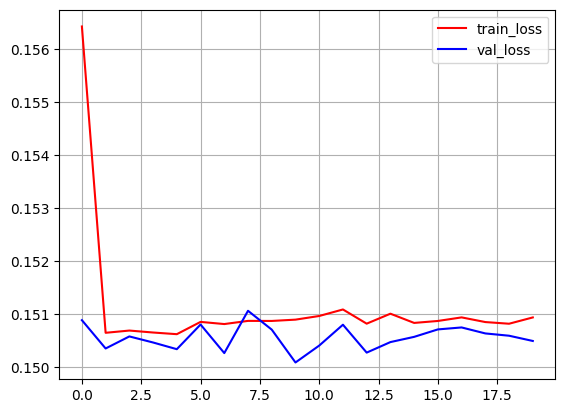

In [63]:
plt.plot(epoch_train_loss, label = 'train_loss', c = 'r')
plt.plot(epoch_val_loss, label = 'val_loss', c = 'b')
plt.legend()
plt.grid()
plt.show()

### Thresholding

In [273]:
from sklearn.metrics import roc_curve

def get_thresholds(predictions, targets):
    threshold_list = []
    fpr_list = []
    tpr_list = []
    ix_list = []
    for i in range(targets.shape[-1]):
        fpr, tpr, thresholds = roc_curve(targets[:,i], predictions[:,i])
        J = tpr - fpr
        ix = np.argmax(J)
        
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        ix_list.append(ix)
        threshold_list.append(thresholds[ix])
    return fpr_list, tpr_list, ix_list, threshold_list

In [274]:
# Set model to evaluation mode
model.eval()

# Initialize empty lists to collect all predictions and targets
all_predictions = []
all_targets = []

# Run through the dataloader
with torch.no_grad():
    for D in dataloader:
        data = D['images'].to(device, dtype=torch.float)
        labels = D['labels'].to(device, dtype=torch.float)
        
        # Forward pass
        y_hat = model(data)
        
        # Apply sigmoid to the model's raw output
        output_sigmoid = torch.sigmoid(y_hat)
        
        # Collect predictions and targets for threshold calculation
        all_predictions.append(output_sigmoid.cpu().numpy())  # Convert to CPU and numpy for roc_curve
        all_targets.append(labels.cpu().numpy())  # Convert to CPU and numpy

# Convert lists to numpy arrays for threshold calculation
all_predictions = np.vstack(all_predictions)  # Shape: (num_samples, num_classes)
all_targets = np.vstack(all_targets)  # Shape: (num_samples, num_classes)

# Call the function to compute thresholds
fpr_CNN, tpr_CNN, ix_CNN, thresholds_CNN = get_thresholds(all_predictions, all_targets)

# Now `threshold_list` contains the thresholds for each class
print("Thresholds for each class:", thresholds_CNN)



/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.w

Thresholds for each class: [np.float32(0.14299175), np.float32(0.14410622), np.float32(0.13730836), np.float32(0.14845945), np.float32(0.15639481), np.float32(0.16595748), np.float32(0.15264305), np.float32(0.18874533), np.float32(0.08741051), np.float32(0.19209988), np.float32(0.059222672), np.float32(0.13999471), np.float32(0.15691505), np.float32(0.17797159), np.float32(0.10107228), np.float32(0.13457535), np.float32(0.2051567), np.float32(0.1529439), np.float32(0.15315536), np.float32(0.2834244), np.float32(0.15720527), np.float32(0.18420073), np.float32(0.13344498), np.float32(0.13806789), np.float32(0.2182499), np.float32(0.126728), np.float32(0.1426337), np.float32(0.15678902), np.float32(0.16765358), np.float32(0.12688729), np.float32(0.18206616), np.float32(0.16025187), np.float32(0.15442447), np.float32(0.15822609), np.float32(0.18668622), np.float32(0.1973454), np.float32(0.09590147), np.float32(0.1467302), np.float32(0.1382503), np.float32(0.13072275), np.float32(0.14392218

/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.w

In [276]:
print(np.mean(thresholds_CNN))#,thresholds_CNN

inf


optimal threshold =  0.14410622


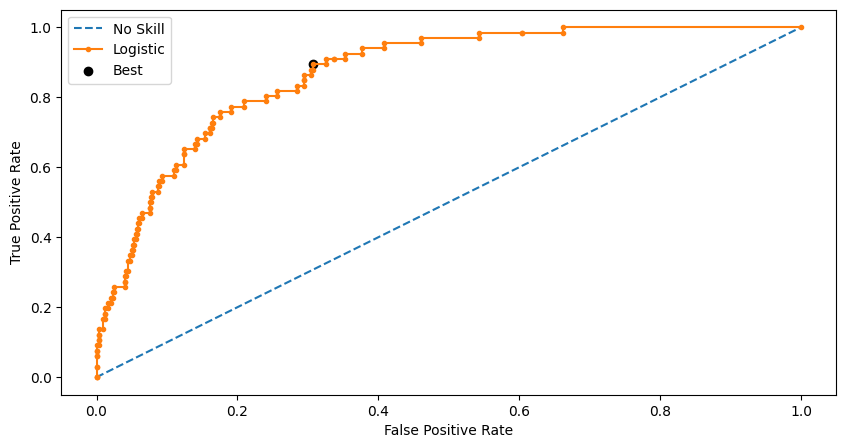

In [277]:
idx_cls = 1
fpr = fpr_CNN[idx_cls]
tpr = tpr_CNN[idx_cls]
ix = ix_CNN[idx_cls]

print('optimal threshold = ', thresholds_CNN[idx_cls])
plt.figure(figsize=(10,5))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill') 

plt.plot(fpr, tpr, marker='.', label='Logistic') 
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [278]:
torch.set_printoptions(threshold=torch.inf)  # Show all elements

print(output_sigmoid[0])

tensor([0.0757, 0.1900, 0.1003, 0.1246, 0.1905, 0.1630, 0.1606, 0.0402, 0.1066,
        0.0356, 0.1885, 0.1327, 0.1236, 0.1734, 0.0956, 0.1489, 0.0412, 0.1491,
        0.1090, 0.0920, 0.1449, 0.1684, 0.1719, 0.1506, 0.0487, 0.1545, 0.1450,
        0.1770, 0.1688, 0.1376, 0.0396, 0.1619, 0.1477, 0.1813, 0.2410, 0.1050,
        0.1459, 0.1814, 0.1483, 0.1168, 0.1428, 0.1819, 0.1741, 0.0420, 0.0435,
        0.0378, 0.1127, 0.1305, 0.0768, 0.1361, 0.1362, 0.1337, 0.1968, 0.1720,
        0.1748, 0.1376, 0.1050, 0.0494, 0.1808, 0.1587, 0.1284, 0.2068, 0.1719,
        0.0403, 0.1520, 0.0648, 0.1464, 0.0843, 0.0625, 0.1655, 0.0621, 0.1431,
        0.1653, 0.1364, 0.0796, 0.1642, 0.1612, 0.0557, 0.1764, 0.0834, 0.2056,
        0.0776, 0.0665, 0.0396, 0.1162, 0.1380, 0.1543, 0.0363, 0.1249, 0.0939,
        0.1581, 0.0913, 0.0346, 0.1763, 0.1645, 0.0671, 0.0911, 0.1803, 0.0425,
        0.0213, 0.0220, 0.1783, 0.0463, 0.0479, 0.1503, 0.1765, 0.0725, 0.0951,
        0.0792, 0.0477, 0.1555, 0.1229, 

### Evaluation

In [279]:
from tqdm import tqdm
import sys

mlc_dataset.mode = 'test'
eval_stats = evaluate(model = model, eval_loader = dataloader, criterion = custom_loss, thresholds = np.array(thresholds_CNN), args = Args())
print(eval_stats)

/tmp/ipykernel_9680/1625301664.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  thresholds = torch.tensor(thresholds, dtype=torch.float32).to("cuda:0")


{'eval_loss': 0.0002243797353003174, 'macro_tss': 0.48753300309181213, 'micro_tss': 0.4994032382965088, 'weighted_tss': 0.36368274688720703}


### Saving optimal thresholds

In [288]:
# with open('../data/thresholds.pkl', 'wb') as f:
#     pickle.dump(np.array(thresholds_CNN), f)

In [289]:
# Load the NumPy array from the pickle file
with open('../data/thresholds.pkl', 'rb') as f:
    loaded_thresholds = pickle.load(f)

### Saving the model

In [280]:
# PATH = '../models/DeepCNNModel'

# torch.save(model.state_dict(), PATH)

In [284]:
model = DeepCNNModel(input_channels,input_size,num_classes)
model.load_state_dict(torch.load(PATH, weights_only=True))
model.to(args.device) 
model.eval()


DeepCNNModel(
  (conv1): Conv2d(11, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0,

In [290]:
mlc_dataset.mode = 'test'
eval_stats = evaluate(model = model, eval_loader = dataloader, criterion = custom_loss, thresholds = loaded_thresholds, args = Args())
print(eval_stats)

/tmp/ipykernel_9680/1625301664.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  thresholds = torch.tensor(thresholds, dtype=torch.float32).to("cuda:0")


{'eval_loss': 0.00022439374879468232, 'macro_tss': 0.48753300309181213, 'micro_tss': 0.4994032382965088, 'weighted_tss': 0.36368274688720703}


## ResNet

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.optim.lr_scheduler import CosineAnnealingLR, LambdaLR
from timm.scheduler import CosineLRScheduler


In [33]:
# Only for full scale training

mlc_dataset = MultiLabelDatasetRescale()
mlc_dataset.full_train_val_test_split()
# mlc_dataset.train_val_test_split()
dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True, worker_init_fn=seed_worker)

In [34]:

# Define Custom ResNet50 model
class CustomResNet50(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNet50, self).__init__()
        
        # Load Pretrained ResNet50
        self.resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

        # Modify the first convolutional layer to accept 11 channels instead of 3
        self.resnet.conv1 = nn.Conv2d(11, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Modify the final fully connected layer to match the number of classes
        self.in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(self.in_features, num_classes)

        # Freeze all layers initially
        for param in self.resnet.parameters():
            param.requires_grad = False

        # Unfreeze the layers after the last residual block (layer4)
        for param in self.resnet.layer4.parameters():
            param.requires_grad = True

        # Unfreeze the fully connected (fc) layer for training
        for param in self.resnet.fc.parameters():
            param.requires_grad = True

    def forward(self, x):
        return self.resnet(x)

# Define Custom ResNet18 
class CustomResNet18(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNet18, self).__init__()
        
        # Load Pretrained ResNet18
        # self.resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        self.resnet = models.resnet18(weights=None) # Entrenamiento sin pesos preentrenados

        # Modify the first convolutional layer to accept 11 channels instead of 3
        self.resnet.conv1 = nn.Conv2d(11, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Modify the final fully connected layer to match the number of classes
        self.in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(self.in_features, num_classes)

        # Freeze all layers initially
        for param in self.resnet.parameters():
            param.requires_grad = True

        # # Unfreeze the layers after the last residual block (layer4)
        # for param in self.resnet.layer4.parameters():
        #     param.requires_grad = False

        # # Unfreeze the fully connected (fc) layer for training
        # for param in self.resnet.fc.parameters():
        #     param.requires_grad = True

    def forward(self, x):
        return self.resnet(x)


In [35]:
def fine_tunning(dataloader, dataset, num_epochs, model, custom_loss, optimizer,delta,patience):
    
    # Initialize the learning rate scheduler
    scheduler = CosineLRScheduler(
        optimizer, 
        t_initial=num_epochs,    # Total epochs
        lr_min=1e-5, #1e-5            # Minimum LR
        warmup_t=2,  #2            # Warm-up epochs
        warmup_lr_init=1e-4 #1e-4     # Initial warm-up LR
    )

    epoch_train_loss = []
    epoch_val_loss = []
    
    best_val_loss = float('inf')
    early_stop_counter = 0
    best_model_state = None

    for epoch in range(num_epochs):
        train_losses = []
        dataset.mode = 'train'
        model.train()

        for D in dataloader:
            optimizer.zero_grad()
            data = D['images'].to(device, dtype=torch.float)
            labels = D['labels'].to(device, dtype=torch.float)
            y_hat = model(data)
            loss = custom_loss(y_hat, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

        epoch_train_loss.append(np.mean(train_losses))

        # Validation
        val_losses = []
        dataset.mode = 'val'
        model.eval()
        with torch.no_grad():
            for D in dataloader:
                data = D['images'].to(device, dtype=torch.float)
                labels = D['labels'].to(device, dtype=torch.float)
                y_hat = model(data)
                loss = custom_loss(y_hat, labels)
                val_losses.append(loss.item())
                
        current_val_loss = np.mean(val_losses)
        epoch_val_loss.append(np.mean(val_losses))

        # **Update Learning Rate Scheduler**
        scheduler.step(epoch + 1)

        # Print progress
        print(f'Train Epoch: {epoch+1} \t Train Loss: {np.mean(train_losses):.6f} \t Val Loss: {np.mean(val_losses):.6f}')
        print(f'Learning Rate: {optimizer.param_groups[0]["lr"]:.8f}')
        
        # Early Stopping Check
        if current_val_loss + delta < best_val_loss:
            best_val_loss = current_val_loss
            best_model_state = model.state_dict()
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            print(f"⚠️ No improvement for {early_stop_counter} epoch(s).")

        if early_stop_counter >= patience:
            print(f"⏹️ Early stopping triggered after {epoch+1} epochs.")
            break

    # Load best model before returning
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return model, epoch_train_loss, epoch_val_loss




# warmup_epochs = 1  # Number of warmup epochs
# total_epochs = num_epochs  # Total training epochs
# min_lr = 1e-6  # Minimum learning rate
# max_lr = 1e-3  # Maximum learning rat

In [36]:

def fine_tune_with_unfreeze_strategy_adamw(
    dataloader,
    dataset,
    num_epochs,
    model,
    custom_loss,
    initial_lr=5e-5,
    unfreeze_at=5, # 3
    patience=3,  # Early stopping patience 3
    delta=1e-7   # Minimum change to qualify as an improvement 1e-5
):
    optimizer = torch.optim.AdamW(
        filter(lambda p: p.requires_grad, model.parameters()),
        lr=initial_lr,
        weight_decay=5e-2
    )

    scheduler = CosineLRScheduler(
        optimizer,
        t_initial=num_epochs,
        lr_min=initial_lr/10,
        warmup_t=2,
        warmup_lr_init=initial_lr
    )

    best_val_loss = float('inf')
    early_stop_counter = 0
    best_model_state = None

    epoch_train_loss = []
    epoch_val_loss = []

    for epoch in range(num_epochs):
        # Unfreeze all layers
        if epoch == unfreeze_at:
            print("🔓 Unfreezing all layers...")
            for param in model.resnet.parameters():
                param.requires_grad = True
            
            # Reinitialize optimizer
            optimizer = torch.optim.AdamW(
                filter(lambda p: p.requires_grad, model.parameters()),
                lr=initial_lr / 10,
                weight_decay=5e-4
            )
            print("🔁 Optimizer reinitialized with lower LR for fine-tuning")
              # ⚠️ Reinitialize the scheduler too
            scheduler = CosineLRScheduler(
                optimizer,
                t_initial=num_epochs - epoch,  # remaining epochs
                lr_min=initial_lr /100,
                warmup_t=1,
                warmup_lr_init=initial_lr / 10
            )
            print("🧭 LR scheduler reinitialized for fine-tuning phase")

        train_losses = []
        dataset.mode = 'train'
        model.train()

        for D in dataloader:
            optimizer.zero_grad()
            data = D['images'].to(device, dtype=torch.float)
            labels = D['labels'].to(device, dtype=torch.float)
            y_hat = model(data)
            loss = custom_loss(y_hat, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

        epoch_train_loss.append(np.mean(train_losses))

        # Validation
        val_losses = []
        dataset.mode = 'val'
        model.eval()
        with torch.no_grad():
            for D in dataloader:
                data = D['images'].to(device, dtype=torch.float)
                labels = D['labels'].to(device, dtype=torch.float)
                y_hat = model(data)
                loss = custom_loss(y_hat, labels)
                val_losses.append(loss.item())

        current_val_loss = np.mean(val_losses)
        epoch_val_loss.append(current_val_loss)

        # Scheduler step
        scheduler.step(epoch + 1)

        # Logging
        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {epoch_train_loss[-1]:.6f} | Val Loss: {current_val_loss:.6f}")
        print(f"Learning Rate: {optimizer.param_groups[0]['lr']:.8f}")

        # Early Stopping Check
        if current_val_loss + delta < best_val_loss:
            best_val_loss = current_val_loss
            best_model_state = model.state_dict()
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            print(f"⚠️ No improvement for {early_stop_counter} epoch(s).")

        if early_stop_counter >= patience:
            print(f"⏹️ Early stopping triggered after {epoch+1} epochs.")
            break

    # Load best model before returning
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return model, epoch_train_loss, epoch_val_loss



In [37]:
args = Args()
num_classes = 1819
dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True)

num_epochs = 30

# model = CustomResNet50(num_classes=num_classes).to(device)
model = CustomResNet18(num_classes=num_classes).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=5e-2)#1e-4, 5e-4

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Loss Function
# loss_fn = 'focal'
loss_fn = 'focal'
criterion = CustomLoss(loss_fn, args).to(args.device)

# Optimizer (AdamW with weight decay)
# Initialize the scheduler with the required arguments
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer,lr_lambda=lambda epoch: warmup_cosine_scheduler(epoch, warmup_epochs, total_epochs, min_lr, max_lr))
# Set up the learning rate scheduler with warm-up and cosine annealing
# lr_scheduler = CosineLRScheduler(optimizer, t_initial=num_epochs, lr_min=1e-5, warmup_t=5, warmup_lr_init=1e-4)

In [38]:
model_RESNET_FOCAL, epoch_train_loss_RESNET_FOCAL, epoch_val_loss_RESNET_FOCAL = fine_tunning(dataloader=dataloader,
                                                                                                dataset=mlc_dataset,
                                                                                                 num_epochs = num_epochs,
                                                                                                 model = model,
                                                                                                 custom_loss = CustomLoss(loss_fn, args).to(args.device),
                                                                                                 optimizer = optimizer,
                                                                                                 delta = 1e-7,
                                                                                                 patience = 3)

# model_RESNET_FOCAL, epoch_train_loss_RESNET_FOCAL, epoch_val_loss_RESNET_FOCAL = fine_tune_with_unfreeze_strategy_adamw(dataloader=dataloader,
#                                                                                                 dataset=mlc_dataset,
#                                                                                                  num_epochs = num_epochs,
#                                                                                                  model = model,
#                                                                                                  custom_loss = CustomLoss(loss_fn, args).to(args.device)
#                                                                                                  )

Train Epoch: 1 	 Train Loss: 0.000347 	 Val Loss: 0.000267
Learning Rate: 0.00010000
Train Epoch: 2 	 Train Loss: 0.000255 	 Val Loss: 0.000258
Learning Rate: 0.00009902
Train Epoch: 3 	 Train Loss: 0.000240 	 Val Loss: 0.000232
Learning Rate: 0.00009780
Train Epoch: 4 	 Train Loss: 0.000227 	 Val Loss: 0.000224
Learning Rate: 0.00009611
Train Epoch: 5 	 Train Loss: 0.000227 	 Val Loss: 0.000220
Learning Rate: 0.00009397
Train Epoch: 6 	 Train Loss: 0.000211 	 Val Loss: 0.000217
Learning Rate: 0.00009141
Train Epoch: 7 	 Train Loss: 0.000202 	 Val Loss: 0.000212
Learning Rate: 0.00008844
Train Epoch: 8 	 Train Loss: 0.000201 	 Val Loss: 0.000221
Learning Rate: 0.00008511
⚠️ No improvement for 1 epoch(s).
Train Epoch: 9 	 Train Loss: 0.000191 	 Val Loss: 0.000218
Learning Rate: 0.00008145
⚠️ No improvement for 2 epoch(s).
Train Epoch: 10 	 Train Loss: 0.000185 	 Val Loss: 0.000220
Learning Rate: 0.00007750
⚠️ No improvement for 3 epoch(s).
⏹️ Early stopping triggered after 10 epochs.


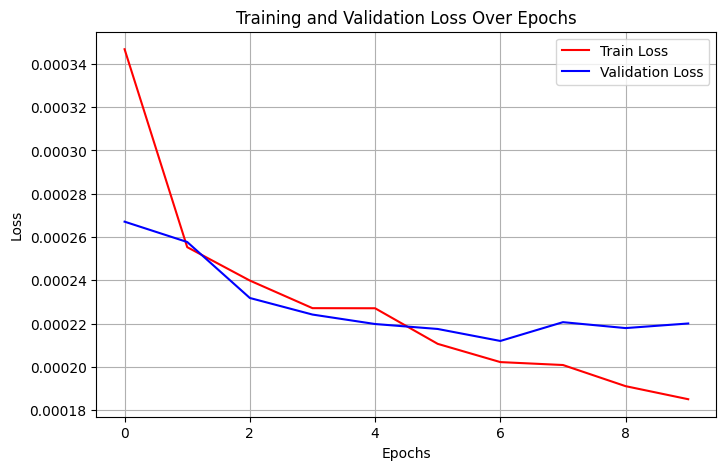

In [40]:
# plot_loss(epoch_train_loss_RESNET_FOCAL[1:],epoch_val_loss_RESNET_FOCAL[1:])
plot_loss(epoch_train_loss_RESNET_FOCAL,epoch_val_loss_RESNET_FOCAL)

In [41]:
fpr_RESNET_FOCAL, tpr_RESNET_FOCAL, ix_RESNET_FOCAL, thresholds_RESNET_FOCAL= computing_thresholds(model = model_RESNET_FOCAL,dataset=mlc_dataset,dataloader=dataloader)


mlc_dataset.mode = 'test'
eval_stats = evaluate(model = model_RESNET_FOCAL, eval_loader = dataloader, criterion = CustomLoss(loss_fn, args).to(args.device), thresholds = np.array(thresholds_RESNET_FOCAL), args = Args())
print(eval_stats)

C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Raul\miniconda3\Lib\site-packages\sk

TypeError: object of type 'NoneType' has no len()

In [42]:
thresholds_RESNET_FOCAL

[0.51030725,
 0.50877166,
 0.41464105,
 0.47786182,
 0.54419076,
 0.48453036,
 0.501971,
 0.49278095,
 0.17338863,
 0.49109235,
 0.43579748,
 0.5932446,
 0.46177122,
 0.5784842,
 0.1451866,
 0.4736443,
 0.15488964,
 0.39171982,
 0.2581608,
 0.6990818,
 0.24740444,
 0.53713137,
 0.3833908,
 0.3343682,
 0.31202126,
 0.42308995,
 0.4457551,
 0.5015118,
 0.5524174,
 0.7524128,
 0.57710564,
 0.49435115,
 0.5157162,
 0.45620003,
 0.49975902,
 0.69424623,
 0.5598379,
 0.4443912,
 0.49477914,
 0.6969452,
 0.53036726,
 0.4921188,
 0.5104886,
 inf,
 0.48637304,
 0.7109127,
 0.523061,
 0.47286072,
 0.55369174,
 0.5046592,
 0.51574254,
 0.4628853,
 0.44463754,
 0.31005734,
 0.5172816,
 0.14058515,
 0.43698597,
 0.5566436,
 0.39570868,
 0.49651006,
 0.44467542,
 0.49411225,
 0.49953505,
 0.7549132,
 0.48326275,
 0.47572902,
 0.50766194,
 0.6636057,
 0.54393,
 0.58066666,
 0.5200653,
 0.5529646,
 0.42763814,
 0.567234,
 0.52335495,
 0.5394428,
 0.57511485,
 0.46584558,
 0.52521276,
 0.51684904,
 0.4

#### Model saving

In [43]:
with open('../models/thresholds_FOCAL_RESNET18_53_tss_1991-2017_full.pkl', 'wb') as f:
    pickle.dump(np.array(thresholds_RESNET_FOCAL), f)

In [44]:
PATH = '../models/RESNET18_53_FOCAL_tss_1991-2017_full'
torch.save(model_RESNET_FOCAL.state_dict(), PATH)

#### Model Loading

In [50]:
model = CustomResNet18(num_classes=num_classes).to(device)
model.load_state_dict(torch.load(PATH, weights_only=True))
model.to(args.device) 
model.eval()

CustomResNet18(
  (resnet): ResNet(
    (conv1): Conv2d(11, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [51]:
# Load the NumPy array from the pickle file
with open('../models/thresholds_BCE_RESNET18_55_tss_1991-2018.pkl', 'rb') as f:
    loaded_thresholds = pickle.load(f)

In [52]:
mlc_dataset.mode = 'test'
eval_stats = evaluate(model = model, eval_loader = dataloader, criterion = CustomLoss('bce', args), thresholds = loaded_thresholds, args = Args())
print(eval_stats)

C:\Users\Raul\AppData\Local\Temp\ipykernel_5576\1625301664.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  thresholds = torch.tensor(thresholds, dtype=torch.float32).to("cuda:0")


{'eval_loss': 0.005927626043558121, 'macro_tss': 0.5370842218399048, 'micro_tss': 0.5555022954940796, 'weighted_tss': 0.4320082664489746}


#### Testing

In [85]:
# scheduler = warmup_cosine_scheduler(optimizer)
epoch_train_loss = []
epoch_val_loss = []
# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    mlc_dataset.mode = 'train'
    train_losses = []
    val_losses = []

    for D in dataloader:
        data = D['images'].to(device, dtype = torch.float)
        labels = D['labels'].to(device, dtype = torch.float)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
    epoch_train_loss.append(np.mean(train_losses))
    #scheduler.step()  # Update learning rate
    lr_scheduler.step(epoch)
    
    # Validation Step (optional)
    model.eval()
    mlc_dataset.mode = 'val'
    with torch.no_grad():
        data = D['images'].to(device, dtype = torch.float)
        labels = D['labels'].to(device, dtype = torch.float)
        outputs = model(data)
        #error = nn.BCEWithLogitsLoss()
        # loss = torch.sum(error(y_hat,labels))
        loss = criterion(outputs, labels)
        val_losses.append(loss.item())

    epoch_val_loss.append(np.mean(val_losses))
    
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {np.mean(train_losses):.4f} - Val Loss: {np.mean(val_losses):.4f}")

print("Training Complete!")

Epoch 1/50 - Train Loss: 0.1158 - Val Loss: 0.1270
Epoch 2/50 - Train Loss: 0.1159 - Val Loss: 0.1249
Epoch 3/50 - Train Loss: 0.1161 - Val Loss: 0.1139
Epoch 4/50 - Train Loss: 0.1161 - Val Loss: 0.1138
Epoch 5/50 - Train Loss: 0.1160 - Val Loss: 0.1343
Epoch 6/50 - Train Loss: 0.1160 - Val Loss: 0.1245
Epoch 7/50 - Train Loss: 0.1159 - Val Loss: 0.1256
Epoch 8/50 - Train Loss: 0.1159 - Val Loss: 0.1146
Epoch 9/50 - Train Loss: 0.1160 - Val Loss: 0.0936
Epoch 10/50 - Train Loss: 0.1160 - Val Loss: 0.1115
Epoch 11/50 - Train Loss: 0.1159 - Val Loss: 0.1160
Epoch 12/50 - Train Loss: 0.1160 - Val Loss: 0.1237
Epoch 13/50 - Train Loss: 0.1160 - Val Loss: 0.1196
Epoch 14/50 - Train Loss: 0.1160 - Val Loss: 0.1133
Epoch 15/50 - Train Loss: 0.1159 - Val Loss: 0.1226
Epoch 16/50 - Train Loss: 0.1159 - Val Loss: 0.1343
Epoch 17/50 - Train Loss: 0.1161 - Val Loss: 0.1340
Epoch 18/50 - Train Loss: 0.1159 - Val Loss: 0.1051
Epoch 19/50 - Train Loss: 0.1160 - Val Loss: 0.1256
Epoch 20/50 - Train L

KeyboardInterrupt: 

In [ ]:
plt.plot(epoch_train_loss, label = 'train_loss', c = 'r')
plt.plot(epoch_val_loss, label = 'val_loss', c = 'b')
plt.legend()
plt.grid()
plt.show()

In [80]:
from tqdm import tqdm
import sys

mlc_dataset.mode = 'test'
eval_stats = evaluate(model = model, eval_loader = dataloader, criterion = criterion, args = Args())
print(eval_stats)

{'eval_loss': 0.04857054352760315, 'macro_tss': -0.014300652779638767, 'micro_tss': -9.47117805480957e-05, 'weighted_tss': -0.00022017955780029297}


### Resnet18

In [26]:
from torchvision import models
from torchvision.models import ResNet18_Weights

In [27]:
model = models.resnet18(weights = ResNet18_Weights.DEFAULT)

In [28]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [30]:
model.fc.in_features

512

### Let's build our model RESNET

In [31]:
class MLC(nn.Module):
    def __init__(self,num_classes):
        super(MLC, self).__init__()
        self.resnet = models.resnet18(weights = ResNet18_Weights.DEFAULT)
        
        # Modify the first convolutional layer to accept 11 channels instead of 3
        self.resnet.conv1 = nn.Conv2d(11, 64, kernel_size=7, stride=2, padding=3, bias=False)
        
        self.in_features = self.resnet.fc.in_features
        self.resnet.fc= nn.Linear(self.in_features, num_classes)
    def forward(self,x):
        x = self.resnet(x)
        return x

In [32]:
model = MLC(num_classes = 10)

In [33]:
model.resnet

ResNet(
  (conv1): Conv2d(11, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [34]:
for name, param in model.resnet.named_parameters():
    print(name, param.requires_grad)

conv1.weight True
bn1.weight True
bn1.bias True
layer1.0.conv1.weight True
layer1.0.bn1.weight True
layer1.0.bn1.bias True
layer1.0.conv2.weight True
layer1.0.bn2.weight True
layer1.0.bn2.bias True
layer1.1.conv1.weight True
layer1.1.bn1.weight True
layer1.1.bn1.bias True
layer1.1.conv2.weight True
layer1.1.bn2.weight True
layer1.1.bn2.bias True
layer2.0.conv1.weight True
layer2.0.bn1.weight True
layer2.0.bn1.bias True
layer2.0.conv2.weight True
layer2.0.bn2.weight True
layer2.0.bn2.bias True
layer2.0.downsample.0.weight True
layer2.0.downsample.1.weight True
layer2.0.downsample.1.bias True
layer2.1.conv1.weight True
layer2.1.bn1.weight True
layer2.1.bn1.bias True
layer2.1.conv2.weight True
layer2.1.bn2.weight True
layer2.1.bn2.bias True
layer3.0.conv1.weight True
layer3.0.bn1.weight True
layer3.0.bn1.bias True
layer3.0.conv2.weight True
layer3.0.bn2.weight True
layer3.0.bn2.bias True
layer3.0.downsample.0.weight True
layer3.0.downsample.1.weight True
layer3.0.downsample.1.bias True
la

In [35]:
mlc_dataset = MultiLabelDataset()
mlc_dataset.train_val_test_split()

In [36]:
device = torch.device('cuda:0')

In [39]:
args = Args()

num_classes = 
num_epochs = 8
# Initialize model, loss, and optimizer

model = MLC(num_classes).to(args.device)
model = model.to(device)
loss_fn = 'bce'  # Choose one of ['bce', 'focal', 'dice']
custom_loss = CustomLoss(loss_fn, args).to(args.device)
optimizer = optim.AdamW(model.parameters(), lr=0.00005)


dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True)
epoch_train_loss = []
epoch_val_loss = []
epoch_train_iou = []
epoch_val_iou = []


In [40]:
for epoch in range(num_epochs):
    train_losses = []
    train_iou = []
    mlc_dataset.mode = 'train'
    model.train()
    for D in dataloader:
        optimizer.zero_grad()
        data = D['images'].to(device, dtype = torch.float)
        labels = D['labels'].to(device, dtype = torch.float)
        y_hat = model(data)
        error = nn.BCEWithLogitsLoss()
        loss = torch.sum(error(y_hat,labels))
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        t_iou = intersection_over_union_top_n(labels, y_hat, top_n=20)
        train_iou.append(t_iou.item())
        
    epoch_train_loss.append(np.mean(train_losses))
    epoch_train_iou.append(np.mean(np.array(train_iou)))#.cpu().numpy()))
    
    val_losses = []
    val_iou = []
    
    mlc_dataset.mode = 'val'
    model.eval()
    with torch.no_grad():
        for D in dataloader:
            data = D['images'].to(device, dtype = torch.float)
            labels = D['labels'].to(device, dtype = torch.float)
            y_hat = model(data)
            error = nn.BCEWithLogitsLoss()
            loss = torch.sum(error(y_hat,labels))
            val_losses.append(loss.item())

            
            v_iou = intersection_over_union_top_n(labels, y_hat, top_n=20)
            val_iou.append(t_iou.item())
            
    epoch_val_loss.append(np.mean(val_losses))
    epoch_val_iou.append(np.mean(np.array(val_iou)))#.cpu().numpy()))
    
    print(f'Train Epoch: {epoch+1} \t Train Loss:{np.mean(train_losses)} \t Val Loss: {np.mean(val_losses)}\t Train IoU:{np.mean(train_iou)} \t Val IoU: {np.mean(val_iou)}')

Train Epoch: 1 	 Train Loss:0.06834691870019309 	 Val Loss: 0.023336169657186937	 Train IoU:0.0012301621497316864 	 Val IoU: 0.00038516533095389605
Train Epoch: 2 	 Train Loss:0.022256482236863658 	 Val Loss: 0.021514339116007343	 Train IoU:0.001472512999456306 	 Val IoU: 0.0018663422670215368
Train Epoch: 3 	 Train Loss:0.021273165049709972 	 Val Loss: 0.020777113534415425	 Train IoU:0.001848866555503272 	 Val IoU: 0.0025173441972583532
Train Epoch: 4 	 Train Loss:0.020652907885851217 	 Val Loss: 0.02014975308961535	 Train IoU:0.0024096503886261557 	 Val IoU: 0.0022906663361936808
Train Epoch: 5 	 Train Loss:0.02017253687161243 	 Val Loss: 0.019752252531253685	 Train IoU:0.002892653283110165 	 Val IoU: 0.0032684532925486565
Train Epoch: 6 	 Train Loss:0.019693542492465636 	 Val Loss: 0.019505897284311763	 Train IoU:0.0034051600091768125 	 Val IoU: 0.002655131509527564
Train Epoch: 7 	 Train Loss:0.019267642474000243 	 Val Loss: 0.01906694294648024	 Train IoU:0.003915669661464876 	 Val

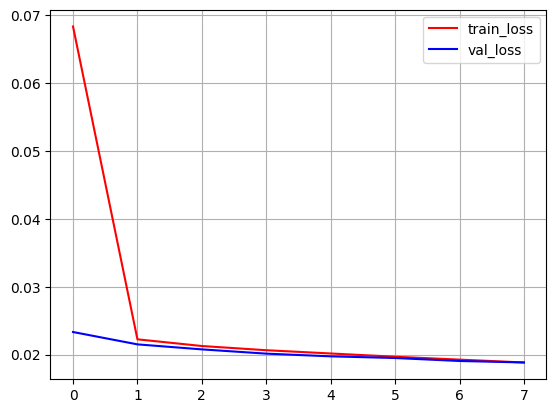

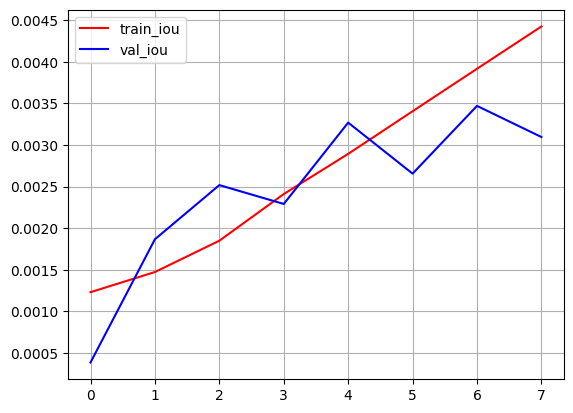

In [41]:
plt.plot(epoch_train_loss, label = 'train_loss', c = 'r')
plt.plot(epoch_val_loss, label = 'val_loss', c = 'b')
plt.legend()
plt.grid()
plt.show()

plt.plot(epoch_train_iou, label = 'train_iou', c = 'r')
plt.plot(epoch_val_iou, label = 'val_iou', c = 'b')
plt.legend()
plt.grid()
plt.show()

### Resnet with Focal Loss

In [42]:
device = torch.device('cuda:0')

In [43]:
args = Args()

num_classes = 5357
num_epochs  = 8
# Initialize model, loss, and optimizer

model = MLC(num_classes).to(args.device)
model = model.to(device)
loss_fn = 'focal'  # Choose one of ['bce', 'focal', 'dice']
custom_loss = CustomLoss(loss_fn, args).to(args.device)
optimizer = optim.AdamW(model.parameters(), lr=0.00005)

In [44]:
mlc_dataset = MultiLabelDataset()
mlc_dataset.train_val_test_split()

In [45]:
num_classes = 5357
model = MLC(num_classes)
model = model.to(device)

#eta = 0.00005
#num_epochs = 8
#optimizer = torch.optim.Adam(model.parameters(), lr=eta)
dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True)
epoch_train_loss = []
epoch_val_loss = []
epoch_train_iou = []
epoch_val_iou = []

In [46]:
for epoch in range(num_epochs):
    train_losses = []
    train_iou = []
    mlc_dataset.mode = 'train'
    model.train()
    for D in dataloader:
        optimizer.zero_grad()
        data = D['images'].to(device, dtype = torch.float)
        labels = D['labels'].to(device, dtype = torch.float)
        y_hat = model(data)
        error = nn.BCEWithLogitsLoss()
        #loss = torch.sum(error(y_hat,labels))
        loss = custom_loss(y_hat, labels)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        t_iou = intersection_over_union_top_n(labels, y_hat, top_n=20)
        train_iou.append(t_iou.item())
        
    epoch_train_loss.append(np.mean(train_losses))
    epoch_train_iou.append(np.mean(np.array(train_iou)))#.cpu().numpy()))
    
    val_losses = []
    val_iou = []
    
    mlc_dataset.mode = 'val'
    model.eval()
    with torch.no_grad():
        for D in dataloader:
            data = D['images'].to(device, dtype = torch.float)
            labels = D['labels'].to(device, dtype = torch.float)
            y_hat = model(data)
            error = nn.BCEWithLogitsLoss()
            # loss = torch.sum(error(y_hat,labels))
            loss = custom_loss(y_hat, labels)
            val_losses.append(loss.item())

            
            v_iou = intersection_over_union_top_n(labels, y_hat, top_n=20)
            val_iou.append(t_iou.item())
            
    epoch_val_loss.append(np.mean(val_losses))
    epoch_val_iou.append(np.mean(np.array(val_iou)))#.cpu().numpy()))
    
    print(f'Train Epoch: {epoch+1} \t Train Loss:{np.mean(train_losses)} \t Val Loss: {np.mean(val_losses)}\t Train IoU:{np.mean(train_iou)} \t Val IoU: {np.mean(val_iou)}')

Train Epoch: 1 	 Train Loss:0.00032042302909471944 	 Val Loss: 0.000325641558817351	 Train IoU:0.00024246396055971125 	 Val IoU: 4.6667904825881124e-05
Train Epoch: 2 	 Train Loss:0.00032096285872319167 	 Val Loss: 0.0003344289012849173	 Train IoU:0.00023985470009405156 	 Val IoU: 0.0003533425333444029
Train Epoch: 3 	 Train Loss:0.00032017216199574047 	 Val Loss: 0.00033700830644485937	 Train IoU:0.00024595371534864147 	 Val IoU: 0.0002506731543689966
Train Epoch: 4 	 Train Loss:0.0003211880753771856 	 Val Loss: 0.0003339947409477969	 Train IoU:0.0002384587175373886 	 Val IoU: 6.222386582521722e-05
Train Epoch: 5 	 Train Loss:0.0003214886997940893 	 Val Loss: 0.00033327752612807425	 Train IoU:0.0002428490654011952 	 Val IoU: 1.555597009428311e-05
Train Epoch: 6 	 Train Loss:0.00032029289969454647 	 Val Loss: 0.0003305375312111672	 Train IoU:0.0002400406858618024 	 Val IoU: 0.00020222754392307252
Train Epoch: 7 	 Train Loss:0.0003209917181600137 	 Val Loss: 0.0003281643424751395	 Train

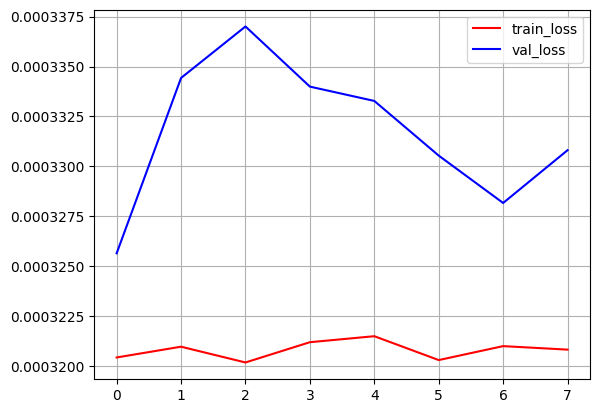

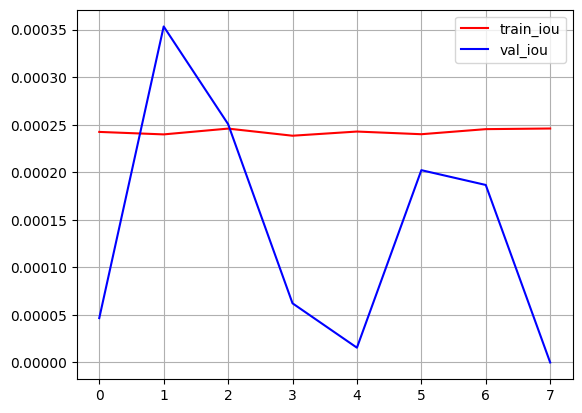

In [47]:
plt.plot(epoch_train_loss, label = 'train_loss', c = 'r')
plt.plot(epoch_val_loss, label = 'val_loss', c = 'b')
plt.legend()
plt.grid()
plt.show()

plt.plot(epoch_train_iou, label = 'train_iou', c = 'r')
plt.plot(epoch_val_iou, label = 'val_iou', c = 'b')
plt.legend()
plt.grid()
plt.show()

## ViT

In [64]:
mlc_dataset = MultiLabelDatasetResize()
mlc_dataset.train_val_test_split()
dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True, worker_init_fn=seed_worker)
device = torch.device('cuda:0')

In [65]:
import timm

class ViT_Climate(nn.Module):
    def __init__(self, num_species, img_size=224, pretrained=True):
        super(ViT_Climate, self).__init__()
        
        # Convolutional Stem to preprocess climate maps (9 channels -> 3)
        self.conv_stem = nn.Sequential(
            nn.Conv2d(11, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(3),
            nn.ReLU()
        )
        
        # Load a ViT model (DeiT3 base, 16x16 patches, modified to accept different input sizes)
        self.vit = timm.create_model(
            "deit3_base_patch16_224", pretrained=pretrained, num_classes=num_species
        )
        
        # Modify first layer to accept climate maps (3 output channels from conv_stem)
        self.vit.patch_embed.proj = nn.Conv2d(
            in_channels=3, out_channels=self.vit.patch_embed.proj.out_channels,
            kernel_size=self.vit.patch_embed.proj.kernel_size, stride=16, padding=0
        )
        
        # Modify classifier head for multi-label species prediction
        self.vit.head = nn.Linear(self.vit.head.in_features, num_species)
        
    def forward(self, x):
        x = self.conv_stem(x)  # Process 9-channel climate maps
        x = self.vit(x)  # Pass through ViT
        return x


In [66]:
import torchvision.transforms as transforms

args = Args()
num_classes = 1819
# dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True)

num_epochs = 30

model = ViT_Climate(num_species=num_classes, img_size=224).to(device)  # Adjust num_species

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=5e-4)#1e-4, 5e-4

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Loss Function
loss_fn = 'focal'
criterion = CustomLoss(loss_fn, args).to(args.device)

In [67]:
model_VIT_FOCAL, epoch_train_loss_VIT_FOCAL, epoch_val_loss_VIT_FOCAL = fine_tunning(dataloader=dataloader,
                                                                                                dataset=mlc_dataset,
                                                                                                 num_epochs = num_epochs,
                                                                                                 model = model,
                                                                                                 custom_loss = CustomLoss(loss_fn, args).to(args.device),
                                                                                                 optimizer = optimizer,
                                                                                                 delta = 1e-6,
                                                                                                 patience = 3)

Train Epoch: 1 	 Train Loss: 0.000324 	 Val Loss: 0.000303
Learning Rate: 0.00082000
Train Epoch: 2 	 Train Loss: 0.000300 	 Val Loss: 0.000292
Learning Rate: 0.00064000
Train Epoch: 3 	 Train Loss: 0.000279 	 Val Loss: 0.000269
Learning Rate: 0.00046000
Train Epoch: 4 	 Train Loss: 0.000263 	 Val Loss: 0.000261
Learning Rate: 0.00028000
Train Epoch: 5 	 Train Loss: 0.000247 	 Val Loss: 0.000256
Learning Rate: 0.00009397
Train Epoch: 6 	 Train Loss: 0.000232 	 Val Loss: 0.000257
Learning Rate: 0.00009141
⚠️ No improvement for 1 epoch(s).
Train Epoch: 7 	 Train Loss: 0.000228 	 Val Loss: 0.000254
Learning Rate: 0.00008844
Train Epoch: 8 	 Train Loss: 0.000223 	 Val Loss: 0.000258
Learning Rate: 0.00008511
⚠️ No improvement for 1 epoch(s).
Train Epoch: 9 	 Train Loss: 0.000219 	 Val Loss: 0.000255
Learning Rate: 0.00008145
⚠️ No improvement for 2 epoch(s).
Train Epoch: 10 	 Train Loss: 0.000215 	 Val Loss: 0.000259
Learning Rate: 0.00007750
⚠️ No improvement for 3 epoch(s).
⏹️ Early stop

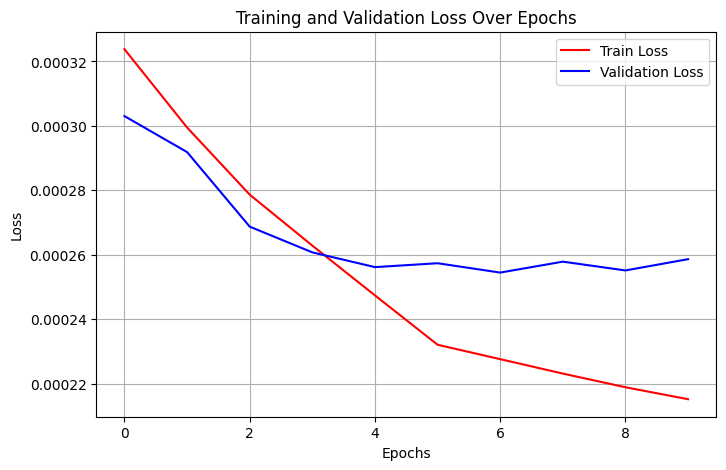

In [68]:
plot_loss(epoch_train_loss_VIT_FOCAL,epoch_val_loss_VIT_FOCAL)

In [69]:
fpr_VIT_FOCAL, tpr_VIT_FOCAL, ix_VIT_FOCAL, thresholds_VIT_FOCAL= computing_thresholds(model = model_VIT_FOCAL,dataset=mlc_dataset,dataloader=dataloader)


mlc_dataset.mode = 'test'
eval_stats = evaluate(model = model_VIT_FOCAL, eval_loader = dataloader, criterion = CustomLoss(loss_fn, args).to(args.device), thresholds = np.array(thresholds_VIT_FOCAL), args = Args())
print(eval_stats)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.w

{'eval_loss': 0.000250808778218925, 'macro_tss': 0.41880613565444946, 'micro_tss': 0.4304875135421753, 'weighted_tss': 0.30276310443878174}


#### Testing

In [220]:
# Takes FOREVER

for epoch in range(num_epochs):
    # Initialize loss tracking lists
    train_losses = []
    mlc_dataset.mode = 'train'  # Set the dataset mode for training
    model.train()  # Set the model to training mode
    
    for D in dataloader:
        optimizer.zero_grad()  # Reset gradients
        
        # Get the batch data and move to device (GPU/CPU)
        data = D['images'].to(device, dtype=torch.float)  # Climate data (9 channels)
        data = transform(data)
        labels = D['labels'].to(device, dtype=torch.float)  # Ground truth (multi-label)
        
        # Forward pass
        y_hat = model(data)  # Get predictions from ViT
        
        # Loss calculation using BCEWithLogitsLoss for multi-label classification
        loss = custom_loss(y_hat, labels)  # Multi-label loss
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update model parameters
        
        # Append the loss to the training loss list
        train_losses.append(loss.item())
        
    # Calculate average training loss for the epoch
    epoch_train_loss = np.mean(train_losses)
    
    # Validation loop
    val_losses = []
    mlc_dataset.mode = 'val'  # Set the dataset mode for validation
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No gradients needed for validation
        for D in dataloader:
            data = D['images'].to(device, dtype=torch.float)
            data = transform(data)            
            labels = D['labels'].to(device, dtype=torch.float)
            
            # Forward pass
            y_hat = model(data)
            
            # Validation loss
            loss = custom_loss(y_hat, labels)
            val_losses.append(loss.item())
    
    # Calculate average validation loss for the epoch
    epoch_val_loss = np.mean(val_losses)
    
    # Print the results for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {epoch_train_loss:.4f} \t Val Loss: {epoch_val_loss:.4f}")


Epoch [1/10] Train Loss: 0.0004 	 Val Loss: 0.0003


KeyboardInterrupt: 

## Vit and Resnet50 from the [paper](https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/2041-210X.14466?utm=)

In [ ]:
from PIL import Image
import torchvision.models as models
import torchvision.transforms as T
import torch.backends.cudnn as cudnn
import torch.nn.functional as F
import torch.nn as nn
import torch

import timm
from timm.models import create_model
from timm.scheduler import CosineLRScheduler
from timm.optim import create_optimizer
from timm.utils import NativeScaler, get_state_dict

In [174]:
class Mlp_CBNA(nn.Module):
    def __init__(self, args, out_dim, n_meta_dim=[512, 128], act_layer=nn.ReLU):
        super(Mlp_CBNA, self).__init__()
        
        self.meta = nn.Sequential(
            nn.Linear(args.n_meta_features, n_meta_dim[0]),
            nn.BatchNorm1d(n_meta_dim[0]),
            act_layer(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(n_meta_dim[0], n_meta_dim[1]),
            nn.BatchNorm1d(n_meta_dim[1]),
            act_layer(inplace=True),
        )
        in_ch = n_meta_dim[-1]
        self.fc = nn.Linear(in_ch, out_dim, bias=True)

    def forward(self, x):
        
        out = self.meta(x)
        out = self.fc(out)
            
        return out
    

class Vit_CBNA(nn.Module):
    def __init__(self, args, out_dim, n_meta_dim=[512, 128], act_layer=nn.GELU, pretrained=False):
        super(Vit_CBNA, self).__init__()
        
        self.base_model = create_model(
        'deit3_base_patch16_224',
        pretrained=pretrained,
        drop_path_rate = args.drop_path,
        num_classes=args.num_classes
        )
        

    def forward(self, x):
        
        out_img = self.base_model(x)
        out = out_img
            
        return out
    
    
class Resnet_CBNA(nn.Module):
    def __init__(self, args, out_dim, n_meta_dim=[512, 128], act_layer=nn.GELU, pretrained=False):
        super(Resnet_CBNA, self).__init__()
        
        self.base_model = create_model(
        'resnet50',
        pretrained=pretrained,
        drop_path_rate = args.drop_path,
        num_classes=args.num_classes
        )
        

    def forward(self, x):
        
        out_img = self.base_model(x)
        out = out_img
            
        return out
    


In [24]:
from lib.cnn.models.inception_env import InceptionEnv

model = InceptionEnv()


ModuleNotFoundError: No module named 'lib'

In [33]:
from torchvision import transforms
from torch.optim.lr_scheduler import CosineAnnealingLR, LambdaLR
from timm.scheduler import CosineLRScheduler

/opt/conda/envs/pytorch_gpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
def get_transform():
    return transforms.Compose([
        transforms.Resize(299)
    ])

In [37]:
num_epochs = 50

args = Args()
num_classes = 1819
dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True)
    
# model = CustomResNet50(num_classes=num_classes).to(device)
model = InceptionEnv().to(device)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Loss Function
loss_fn = 'focal'
criterion = CustomLoss(loss_fn, args).to(args.device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

# Optimizer (AdamW with weight decay)
# Initialize the scheduler with the required arguments
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer,lr_lambda=lambda epoch: warmup_cosine_scheduler(epoch, warmup_epochs, total_epochs, min_lr, max_lr))
# Set up the learning rate scheduler with warm-up and cosine annealing
# lr_scheduler = CosineLRScheduler(optimizer, t_initial=num_epochs, lr_min=1e-5, warmup_t=5, warmup_lr_init=1e-4)

In [41]:
!export PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


In [42]:
# scheduler = warmup_cosine_scheduler(optimizer)
epoch_train_loss = []
epoch_val_loss = []
# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    mlc_dataset.mode = 'train'
    train_losses = []
    val_losses = []

    for D in dataloader:
        data = D['images'].to(device, dtype = torch.float)
        labels = D['labels'].to(device, dtype = torch.float)
        
        # Apply the transformations to each batch
        transform = get_transform()  # Define the transformations as needed

        # Apply the transformations to each image in the batch
        data = torch.stack([transform(img) for img in data])

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
    epoch_train_loss.append(np.mean(train_losses))
    # lr_scheduler.step(epoch)
    
    # Validation Step (optional)
    model.eval()
    mlc_dataset.mode = 'val'
    with torch.no_grad():
        data = D['images'].to(device, dtype = torch.float)
        labels = D['labels'].to(device, dtype = torch.float)
        #error = nn.BCEWithLogitsLoss()
        # loss = torch.sum(error(y_hat,labels))
        
        # Apply the transformations to each batch
        transform = get_transform()  # Define the transformations as needed

        # Apply the transformations to each image in the batch
        data = torch.stack([transform(img) for img in data])
        
        outputs = model(data)

        loss = criterion(outputs, labels)
        val_losses.append(loss.item())

    epoch_val_loss.append(np.mean(val_losses))
    
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {np.mean(train_losses):.4f} - Val Loss: {np.mean(val_losses):.4f}")

print("Training Complete!")

OutOfMemoryError: CUDA out of memory. Tried to allocate 350.00 MiB. GPU 0 has a total capacity of 15.77 GiB of which 62.19 MiB is free. Process 2574685 has 15.70 GiB memory in use. Of the allocated memory 15.05 GiB is allocated by PyTorch, and 302.90 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)